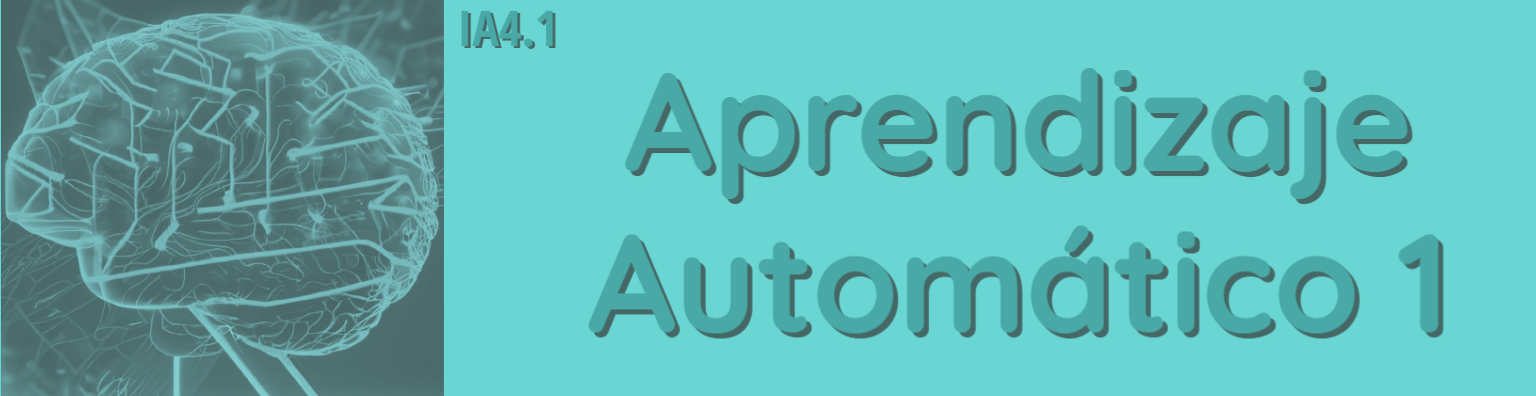

TRABAJO PRÁCTICO PREDICCIÓN DE LLUVIA EN AUSTRALIA

Estudiantes:

* Alomar, Francisco J.

* Perrone, Martín L.

# INTRODUCCIÓN

En el siguiente trabajo aplicamos los conocimientos adquiridos en la materia Aprendizaje Automático I. De modo general, principalmente, hacemos uso de dos librerías: Scikit-Learn y TensorFlow. Con la primera, implementamos distintos modelos de clasificación y regresión, hacemos el pre-procesamiento de datos y evaluamos las métricas tras el entrenamiento de los modelos. Con la segunda, construimos modelos (también de regresión y clasificación) de redes neuronales para los cuales también obtenemos métricas que evaluamos. Además de estas librerías, utilizamos otras como Pandas, Numpay, etc., que se importan en el primer punto del trabajo y son también necesarias para el procesamiento de los datos, construcción de gráficos, etc.


El conjunto de datos del que partimos se encuentra en el archivo weatherAUS.csv, que contiene datos meteorológicos para distintas locaciones del país Australia. El objetivo principal de todo el trabajo es predecir si dado un día para el cual se ingresen determinados datos meteorológicos, al siguiente lloverá o no (mediante modelos de clasificación) y cuántos milímetros lloverá (mediante modelos de regresión). De todo el dataset tomamos cinco locaciones (Sydney, SydneyAirport, Canberra, Melbourne y MelbourneAirport) a las cuales tratamos como una sola. Es decir, la predicción se hace para todas las locaciones a la vez. Luego, con los mejores modelos obtenidos, generamos una app mediante Streamlit, que es una librería que nos permite generar un front-end de fácil uso para un usuario no versado en programación que quiera predecir la lluvia en Australia.


El trabajo está dividido en secciones tituladas según las tópicas que tratamos. En cada sección explicamos el proceso de trabajo, hacemos comentarios al código e interpretamos los resultados que obtenemos. Hacia el final, deducimos algunas conclusiones.  


# 1) IMPORTACIÓN DE LIBRERIAS Y DEFNICIÓN DE FUNCIONES, CLASES Y OBJETOS.

A continuación impotamos las librerias correspondientes para implemetar los modelos de aprendizaje automático.

In [3]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 4.1 MB/s eta 0:00:00


In [4]:
import shap
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import warnings
warnings.filterwarnings("ignore")
from geopy.distance import geodesic
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.models import load_model
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam
from sklearn.impute import SimpleImputer
import joblib

A continuación definimos funciónes, clases y objetos para facilitar la lectura del código que implemetamos.

In [5]:
'''
Lo siguiente es un diccionario que contiene las coordenadas de las ciudades del
dataset de Australia, que son necesarias para el tratamiento de los datos.

'''

coordenadas_locaciones = {
    'Albury': (-36.0737, 146.9135),
    'Badgerys Creek': (-33.8796, 150.752),
    'Cobar': (-31.4983, 145.8345),
    'Coffs Harbour': (-30.2963, 153.1157),
    'Moree': (-29.464, 149.8413),
    'Newcastle': (-32.9267, 151.7789),
    'Norah Head': (-33.2819, 151.5677),
    'Norfolk Island': (-29.028, 167.9547),
    'Penrith': (-33.7567, 150.6955),
    'Richmond': (-33.5963, 150.7498),
    'Sydney': (-33.8688, 151.2093),
    'Sydney Airport': (-33.9399, 151.1753),
    'Wagga Wagga': (-35.115, 147.3681),
    'Williamtown': (-32.7997, 151.8433),
    'Wollongong': (-34.424, 150.8938),
    'Canberra': (-35.2809, 149.1300),
    'Tuggeranong': (-35.4234, 149.0926),
    'Mount Ginini': (-35.5291, 148.7724),
    'Ballarat': (-37.5622, 143.8503),
    'Bendigo': (-36.757, 144.2787),
    'Sale': (-38.1063, 147.0679),
    'Melbourne Airport': (-37.6733, 144.8435),
    'Melbourne': (-37.8136, 144.9631),
    'Mildura': (-34.1956, 142.1618),
    'Nhil': (-36.3327, 141.6511),
    'Portland': (-38.3632, 141.6052),
    'Watsonia': (-37.7129, 145.0835),
    'Dartmoor': (-37.9212, 141.2746),
    'Brisbane': (-27.4698, 153.0251),
    'Cairns': (-16.9204, 145.7709),
    'Gold Coast': (-28.0167, 153.4000),
    'Townsville': (-19.2587, 146.8169),
    'Adelaide': (-34.9285, 138.6007),
    'Mount Gambier': (-37.8284, 140.7804),
    'Nuriootpa': (-34.4664, 138.9914),
    'Woomera': (-31.1996, 136.8254),
    'Albany': (-35.0248, 117.8837),
    'Witchcliffe': (-34.0264, 115.1004),
    'Pearce RAAF': (-31.6675, 116.0052),
    'Perth Airport': (-31.9385, 115.9674),
    'Perth': (-31.9505, 115.8605),
    'Salmon Gums': (-32.9811, 121.6484),
    'Walpole': (-34.9774, 116.7319),
    'Hobart': (-42.8821, 147.3272),
    'Launceston': (-41.4298, 147.1500),
    'Alice Springs': (-23.6980, 133.8807),
    'Darwin': (-12.4628, 130.8418),
    'Katherine': (-14.4644, 132.2630),
    'Uluru': (-25.3444, 131.0369)
}

In [6]:
def calcular_ciudades_cercanas(coordenadas, ciudad_coords, umbral_distancia=20):
    """
    Calcula ciudades cercanas a una ubicación.

    :param coordenadas: Diccionario de coordenadas de ciudades.
    :param ciudad_coords: Coordenadas de la ciudad de referencia.
    :param umbral_distancia: Distancia máxima para considerar una ciudad cercana (por defecto: 20 km).
    :return: Diccionario de ciudades cercanas y sus distancias.
    """
    ciudades_cercanas = {}

    for ciudad, coords in coordenadas.items():
        distancia = geodesic(ciudad_coords, coords).kilometers
        if distancia < umbral_distancia:
            ciudades_cercanas[ciudad] = {'Distancia (km)': distancia}

    return ciudades_cercanas

In [7]:
def filtrar_por_locaciones(df, *locaciones):
    """
    Filtra un DataFrame por una o varias locaciones.

    :param df: DataFrame original.
    :param locaciones: Una o varias locaciones a filtrar.
    :return: DataFrame filtrado por las locaciones especificadas.
    """
    if not locaciones:
        raise ValueError("Al menos una locación debe ser especificada.")

    locaciones_dataframes = {}

    for locacion in locaciones:
        locacion_df = df[df['Location'] == locacion]
        locaciones_dataframes[locacion] = locacion_df

    return locaciones_dataframes

In [8]:
def reemplazar_valores_nulos(df_origen, *df_destinos, columna_fecha='Date'):
    """
    Reemplaza los valores nulos en un DataFrame de origen con los valores correspondientes en
    varios DataFrames de destino tomando como referencia al día.

    :param df_origen: DataFrame de origen.
    :param df_destinos: Lista variable de DataFrames de destino.
    :param columna_fecha: Nombre de la columna que contiene las fechas (por defecto: 'Date').
    """
    for index, row in df_origen.iterrows():
        dia = row[columna_fecha]
        destinos = [destino.loc[destino[columna_fecha] == dia] for destino in df_destinos]
        for column in df_origen.columns:
            if pd.isna(row[column]):
                for destino in destinos:
                    if not destino.empty and not pd.isna(destino.iloc[0][column]):
                        reemplaza = destino.iloc[0][column]
                        df_origen.at[index, column] = reemplaza
                        break

In [9]:
def combinar_y_promediar_columnas(df, columna_1, columna_2, nueva_columna, fillna=True):
    """
    Combina y promedia dos columnas específicas en un DataFrame.

    :param df: DataFrame en el que se realizarán los cambios.
    :param columna_1: Nombre de la primera columna.
    :param columna_2: Nombre de la segunda columna.
    :param nueva_columna: Nombre de la nueva columna que contendrá el promedio de las dos columnas anteriores.
    :param fillna: Si es True, rellena los valores NaN en la nueva columna con los valores de la otra columna.
                   Si es False, deja los valores NaN en la nueva columna. Por defecto, es True.
    """
    df[nueva_columna] = df[[columna_1, columna_2]].mean(axis=1, skipna=True)

    if fillna:
        # Rellenar NaN en la nueva columna con valores de la otra columna solo cuando la nueva columna es NaN
        df[nueva_columna].fillna(df[columna_1], inplace=True)
        df[nueva_columna].fillna(df[columna_2], inplace=True)

    df.drop([columna_1, columna_2], axis=1, inplace=True)

In [10]:
class TratamientoDeDatos:
    def __init__(self, df):
        """
        Inicializa la clase con un DataFrame.

        :param df: DataFrame a ser utilizado.
        """
        self.df = df

    def estandarizar_col_num(self):
        """
        Estandariza las columnas numéricas del DataFrame.
        """
        columnas_numericas = self.df.select_dtypes(include=['float64']).columns

        self.df[columnas_numericas] = (self.df[columnas_numericas] - self.df[columnas_numericas].mean()) / self.df[columnas_numericas].std()
        return self.df

    def convertir_a_dummies(self, columnas):
        """
        Convierte las columnas especificadas a variables dummy.

        :param columnas: Lista de nombres de columnas a convertir.
        """
        self.df = pd.get_dummies(self.df, columns=columnas, prefix=columnas)

        return self.df

    def eliminar_columna(self, columna):
        """
        Elimina la columnas del DataFrame

        :param columna: Nombre de la columna a eliminar.
        """
        self.df.drop(columna, axis=1, inplace=True)

        return self.df

In [11]:
def obtener_estacion(fecha):
    """
    Determina la estación del año.

    :param fecha: Objeto datetime que representa la fecha.
    :return: Cadena representando la estación del año ('Primavera', 'Verano', 'Otoño' o 'Invierno').
    """

    mes = fecha.month

    # Ajustar los rangos para el hemisferio sur
    if 9 <= mes <= 11:
        return 'Primavera'
    elif 12 == mes or 1 <= mes <= 2:
        return 'Verano'
    elif 3 <= mes <= 5:
        return 'Otoño'
    else:
        return 'Invierno'

In [12]:
def boxplots(X,y,z):
  data = pd.concat([pd.DataFrame(y, columns=['RainTomorrow']), pd.DataFrame(X, columns=z)], axis=1)

  num_features = len(z)
  num_rows = num_features // 3 + 1

  fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
  fig.subplots_adjust(hspace=0.5)

  # Se recorre cada feature para generar su diagrama de caja respecto de la salida
  for i, feature in enumerate(data.columns[1:]):
      row = i // 3
      col = i % 3
      sns.boxplot(x='RainTomorrow', y=feature, data=data, ax=axes[row, col])
      axes[row, col].set_title(f'Diagrama de caja de {feature}')
      axes[row, col].set_xlabel('RainTomorrow')
      axes[row, col].set_ylabel(feature)

  # Eliminar subplots vacíos si es necesario
  if num_features % 3 != 0:
      for i in range(num_features % 3, 3):
          fig.delaxes(axes[num_rows - 1, i])

  plt.show()

In [13]:
def plot_predict_lienal (x, y):

  plt.scatter(x, y)
  plt.xlabel('Valores Reales')
  plt.ylabel('Predicciones')
  plt.title('Valores Reales vs Predicciones')

  # Dibujamos la línea de perfección
  diagonal = np.linspace(min(y_test_reg.min(), Y_pred.min()), max(y_test_reg.max(), Y_pred.max()))
  plt.plot(diagonal, diagonal, '-r')
  plt.show()

In [14]:
def plot_residuos_lineal (x, y):

  # Calculamos los residuos
  residuos = x - y

  # Graficamos los residuos
  plt.scatter(y, residuos)
  plt.xlabel('Predicciones')
  plt.ylabel('Residuos')
  plt.title('Residuos de la Regresión Lineal')
  plt.axhline(y=0, color='red', linestyle='--')  # Agregamos línea horizontal en y=0
  plt.show()

In [15]:
def plot_matriz_temperatura(df):

  plt.figure(figsize=(12, 9))

  sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".3f")

  plt.title('matriz de correlación', pad = 30)

  plt.show()

In [16]:
def plot_boxplot (df):
  plt.figure(figsize=(12, 6))
  df[df.columns].boxplot()
  plt.title('Box Plot de todas las varialbles')
  plt.ylabel('Valor')
  plt.xticks(rotation=45)

  plt.show()

In [17]:
def plot_matrix (x, y):

  # Calcular la matriz de confusión
  conf_matrix = confusion_matrix(x, y)

  # Clases para las etiquetas del gráfico
  clases = ['No Llueve', 'Llueve']

  # Plotear la matriz de confusión como un heatmap
  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
              xticklabels=clases, yticklabels=clases, cbar=False)
  plt.xlabel('Predecido')
  plt.ylabel('Real')
  plt.title('Matriz de Confusión')
  plt.show()

In [18]:
def plot_ROC (x, y):
  # Calculamos la ROC y el AUC
  fpr, tpr, thresholds = roc_curve(x, y)
  roc_auc = auc(fpr, tpr)
  # Grafico la curva ROC
  plt.figure(figsize=(6, 4))
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('Tasa de Falsos Positivos (FPR)')
  plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
  plt.title('Curva ROC')
  plt.legend(loc="lower right")
  plt.show()

# 2) EXPLORACIÓN DE LOS DATOS



En esta sección exploramos los datos con los que trabajamos

In [19]:
#importamos el archivo y generamos el dataframe
df = pd.read_csv('weatherAUS.csv')
df_original = df

In [20]:
#apreciamos el nombre de las columnas. El estilo es camel y consideramos que no hay problemas en cómo estan definidas (salvo la primera, que tratamos más adelante)
df.columns

Index(['Unnamed: 0', 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'RainfallTomorrow'],
      dtype='object')

In [21]:
#obsevamos los cinco primeros registros dataframe. Esto también devuelve la cantidad de columnas.
df.head()

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
0,0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,0.0
1,1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,0.0
2,2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,0.0
3,3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,1.0
4,4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,0.2


In [22]:
#observamos los último 5 registros del df. Esto nos devuelve además el total de registros.
df.tail()

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
145407,145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No,0.0
145408,145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No,0.0
145409,145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No,0.0
145410,145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No,0.0
145411,145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No,0.0


In [23]:
#utilizamos el método .describe(), incluyendo a las variables categóricas para hacer una primera observación general de los datos
df.describe(include=['number', 'object'])

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
count,145412.000000,145412,145412,143928.000000,144159.000000,142152.000000,82658.000000,75616.000000,135096,135159.000000,...,140907.000000,130351.000000,130388.000000,89542.000000,86076.000000,143646.000000,141805.000000,142152,142153,142153.000000
unique,NaN,3435,49,NaN,NaN,NaN,NaN,NaN,16,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN
top,NaN,2013-11-11,Canberra,NaN,NaN,NaN,NaN,NaN,W,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,NaN
freq,NaN,49,3435,NaN,NaN,NaN,NaN,NaN,9910,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110276,110281,NaN
mean,72728.184393,NaN,NaN,12.195873,23.223176,2.361516,5.468616,7.611241,NaN,40.036564,...,51.537432,1017.649277,1015.255184,4.447287,4.509770,16.992780,21.685249,NaN,NaN,2.361242
std,41990.722236,NaN,NaN,6.398018,7.118770,8.479338,4.193871,3.785612,NaN,13.607212,...,20.796720,7.107132,7.037981,2.887161,2.720306,6.488045,6.936358,NaN,NaN,8.479084
min,0.000000,NaN,NaN,-8.500000,-4.800000,0.000000,0.000000,0.000000,NaN,6.000000,...,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,NaN,NaN,0.000000
25%,36362.750000,NaN,NaN,7.600000,17.900000,0.000000,2.600000,4.800000,NaN,31.000000,...,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,NaN,NaN,0.000000
50%,72727.500000,NaN,NaN,12.000000,22.600000,0.000000,4.800000,8.400000,NaN,39.000000,...,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,NaN,NaN,0.000000
75%,109093.250000,NaN,NaN,16.900000,28.200000,0.800000,7.400000,10.600000,NaN,48.000000,...,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,NaN,NaN,0.800000


La primera columna del df "Unamed: 0", pareciera contener el número ordinal de cada registro observado. Consideramos que podemos prescindir de esta columna dado que ya tenemos los índices del df para identificar a cada registro. Por otra parte, hay un error en alguna parte de esta columna dado que el número final contenido en el último registro no coincide con el del índice. Por lo tanto, eliminamos la columna del df.

In [24]:
df = df.drop('Unnamed: 0', axis=1)

In [25]:
#Cantidad de valores faltantes.
df.isna().sum()

Date                    0
Location                0
MinTemp              1484
MaxTemp              1253
Rainfall             3260
Evaporation         62754
Sunshine            69796
WindGustDir         10316
WindGustSpeed       10253
WindDir9am          10562
WindDir3pm           4226
WindSpeed9am         1767
WindSpeed3pm         3061
Humidity9am          2653
Humidity3pm          4505
Pressure9am         15061
Pressure3pm         15024
Cloud9am            55870
Cloud3pm            59336
Temp9am              1766
Temp3pm              3607
RainToday            3260
RainTomorrow         3259
RainfallTomorrow     3259
dtype: int64

In [26]:
#Identificamos el tipo de dato de cada columna
df.dtypes

Date                 object
Location             object
MinTemp             float64
MaxTemp             float64
Rainfall            float64
Evaporation         float64
Sunshine            float64
WindGustDir          object
WindGustSpeed       float64
WindDir9am           object
WindDir3pm           object
WindSpeed9am        float64
WindSpeed3pm        float64
Humidity9am         float64
Humidity3pm         float64
Pressure9am         float64
Pressure3pm         float64
Cloud9am            float64
Cloud3pm            float64
Temp9am             float64
Temp3pm             float64
RainToday            object
RainTomorrow         object
RainfallTomorrow    float64
dtype: object

Comenzamos con la columna "Date" que no tiene valores nulos. La pasamos a formato datetime porque es de últilidad más adelante.

In [27]:
#pasamos la columna Date a datetime
df['Date'] = pd.to_datetime(df['Date'])


# 3) TRATAMIENTO DE VALORES NaN

In [28]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'RainfallTomorrow'],
      dtype='object')

El resto de las columnas tienen de modo variable una catidad cosiderable de NaNs. Las locaciones en cuestión son Sydney, Sydney Airport, Melbourne Airport, Melbourne y Canberra. Antes de disponernos a completar los valores faltantes de algún modo, consideramos pertinente averiguar las locaciones "cercanas" para las cuidades con cuyos datos construiremos los modelos, dado que estos datos "cercanos" podrían ayudarnos a completar los faltante. Es por ello que generamos un diccionario que se encuntra en la sección (1). Consideramos "cercanas" a las locaciones que estén a menos de 20 km una de otra, respecto de las que nos interesan.



In [29]:
#asignamos las coordenadas de las ciudades que nos interesan del dataset en base al diccionario a cordenadas_locacciones
sydney_coords = coordenadas_locaciones['Sydney']
canberra_coords = coordenadas_locaciones['Canberra']
melbourne_coords = coordenadas_locaciones['Melbourne']

#llamamos a la función correspondientes para obtener las ciudades cercanas
ciudades_cercanas_sydney = calcular_ciudades_cercanas(coordenadas_locaciones, sydney_coords)
ciudades_cercanas_canberra = calcular_ciudades_cercanas(coordenadas_locaciones, canberra_coords)
ciudades_cercanas_melbourne = calcular_ciudades_cercanas(coordenadas_locaciones, melbourne_coords)

#imprimimos los resultas
print(ciudades_cercanas_sydney)
print(ciudades_cercanas_canberra)
print(ciudades_cercanas_melbourne)


{'Sydney': {'Distancia (km)': 0.0}, 'Sydney Airport': {'Distancia (km)': 8.490272882048577}}
{'Canberra': {'Distancia (km)': 0.0}, 'Tuggeranong': {'Distancia (km)': 16.17130477982157}}
{'Melbourne Airport': {'Distancia (km)': 18.804492010342678}, 'Melbourne': {'Distancia (km)': 0.0}, 'Watsonia': {'Distancia (km)': 15.41013874610397}}


Comezamos por Sydney y Sydney Ariport. Estas locaciones están a 8.5 km de distancia una de otra y evalueamos las diferencia/similitud de los registros al compararlos.

In [30]:
#llamamos a la función correspondientes para la ciudad de Sydney y SydenyAirport
sydney_data= filtrar_por_locaciones(df, 'Sydney', 'SydneyAirport')

#Luego dividimos el nuevo dataframe
sydney_df = sydney_data.get('Sydney', pd.DataFrame())
sydney_airport_df = sydney_data.get('SydneyAirport', pd.DataFrame())



Para apreciar qué tan parecidos son los registros, filtramos los valores para una misma fecha de ambas locaciones, Sydney y SydneyAirport.

In [31]:
# Filtramos tanto sydney_df como sydney_airport_df para una misma fecha
filtered_sydney_df = sydney_df[sydney_df['Date'] == '2017-06-22']
filtered_airport_df = sydney_airport_df[sydney_airport_df['Date'] == '2017-06-22']

In [32]:
filtered_sydney_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
33507,2017-06-22,Sydney,9.3,19.2,0.0,2.0,9.2,W,30.0,W,...,53.0,1028.5,1024.6,2.0,2.0,11.0,18.7,No,No,0.0


In [33]:
filtered_airport_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
36515,2017-06-22,SydneyAirport,9.5,17.8,0.2,2.0,9.2,SW,35.0,NNW,...,70.0,1028.3,1024.6,2.0,2.0,14.3,16.8,No,No,0.0


Aunque desconocemos del tema meteorológico en particular, los valores se aporximan lo sufientementes como remplazarlos uno con otros cuando haya faltantes. Identificamos cuantos NaN hay para Sydney y Sydney Airport

In [34]:
sydney_df.isna().sum()

Date                   0
Location               0
MinTemp                4
MaxTemp                2
Rainfall               7
Evaporation           51
Sunshine              16
WindGustDir         1038
WindGustSpeed       1038
WindDir9am            56
WindDir3pm            33
WindSpeed9am          26
WindSpeed3pm          25
Humidity9am           15
Humidity3pm           13
Pressure9am           21
Pressure3pm           19
Cloud9am             568
Cloud3pm             563
Temp9am                5
Temp3pm                4
RainToday              7
RainTomorrow           7
RainfallTomorrow       7
dtype: int64

In [35]:
sydney_airport_df.isna().sum()

Date                 0
Location             0
MinTemp              1
MaxTemp              0
Rainfall             4
Evaporation         46
Sunshine            16
WindGustDir         51
WindGustSpeed       51
WindDir9am           8
WindDir3pm           4
WindSpeed9am         3
WindSpeed3pm         1
Humidity9am          2
Humidity3pm          4
Pressure9am          8
Pressure3pm          3
Cloud9am             4
Cloud3pm             0
Temp9am              1
Temp3pm              1
RainToday            4
RainTomorrow         4
RainfallTomorrow     4
dtype: int64

La siguiente linea de código toma sydney_df y en base a al valor de la columna "Date" para un registro, busca en sydney_airport_df el mismo día. Luego evalua para cada columna del sydney_df si este es NaN, y, si además existe para el mismo día un registro en sydney_airport_df. De cumplirse la  condición, se reemplaza el valor del sydney_df con el de sydney_airpor_df. Por último, hacemos los mimos, pero al revés, es decir, reemplazamos los valores de sydney_airport_df con los de sydney_df.

In [36]:
# Llamamos a la función corespondiente con el fin de reemplazar los valores nulos para sydney_df y sydney_airport_df, y viceversa.
reemplazar_valores_nulos(sydney_df, sydney_airport_df)
reemplazar_valores_nulos(sydney_airport_df, sydney_df)

In [37]:
sydney_df.isna().sum()

Date                  0
Location              0
MinTemp               0
MaxTemp               0
Rainfall              0
Evaporation          51
Sunshine             16
WindGustDir         361
WindGustSpeed       361
WindDir9am            7
WindDir3pm            3
WindSpeed9am          0
WindSpeed3pm          3
Humidity9am           0
Humidity3pm           1
Pressure9am           1
Pressure3pm           0
Cloud9am              4
Cloud3pm              0
Temp9am               0
Temp3pm               0
RainToday             0
RainTomorrow          0
RainfallTomorrow      0
dtype: int64

In [38]:
sydney_airport_df.isna().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation         46
Sunshine            16
WindGustDir         26
WindGustSpeed       26
WindDir9am           1
WindDir3pm           0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             4
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday            0
RainTomorrow         0
RainfallTomorrow     0
dtype: int64

Los valores NaN diminuyeron con la metodología implementada. Ahora pasamos a hacer el mismo proceso para Canberra

In [39]:
print(ciudades_cercanas_canberra)

{'Canberra': {'Distancia (km)': 0.0}, 'Tuggeranong': {'Distancia (km)': 16.17130477982157}}


In [40]:
#llamamos a la función correspondientes para la ciudad de Canberra y Tuggeranong, y viceversa.
canberra_data = filtrar_por_locaciones(df, 'Canberra', 'Tuggeranong')

#Luego dividimos el nuevo dataframe
canberra_df = canberra_data.get('Canberra', pd.DataFrame())
tuggeranong_df = canberra_data.get('Tuggeranong', pd.DataFrame())


In [41]:
# Filtra tanto sydney_df como sydney_airport_df con las mismas fechas aleatorias
filtered_canberra_df = canberra_df[canberra_df['Date'] == '2017-06-22']
filtered_tuggeranong_df= tuggeranong_df[tuggeranong_df['Date'] == '2017-06-22']

In [42]:
filtered_canberra_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
49005,2017-06-22,Canberra,-0.4,13.9,0.0,NaN,NaN,NW,37.0,NNW,...,56.0,1029.9,1025.6,7.0,NaN,4.0,13.3,No,No,0.4


In [43]:
filtered_tuggeranong_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
52043,2017-06-22,Tuggeranong,-0.4,14.0,0.0,NaN,NaN,N,24.0,NaN,...,44.0,1029.5,1025.0,NaN,NaN,6.0,13.1,No,No,0.0


In [44]:
canberra_df.isna().sum()

Date                   0
Location               0
MinTemp                6
MaxTemp                3
Rainfall              18
Evaporation         1603
Sunshine            1914
WindGustDir          339
WindGustSpeed        337
WindDir9am           541
WindDir3pm           228
WindSpeed9am         229
WindSpeed3pm         223
Humidity9am           63
Humidity3pm           12
Pressure9am          226
Pressure3pm          221
Cloud9am            1071
Cloud3pm            1262
Temp9am               18
Temp3pm                7
RainToday             18
RainTomorrow          18
RainfallTomorrow      18
dtype: int64

In [45]:
# Llamamos a la función corespondiente con el fin de reemplazar los valores nulos para canberra_df y canberra_df, y viceversa.
reemplazar_valores_nulos(canberra_df, tuggeranong_df)
reemplazar_valores_nulos(tuggeranong_df, canberra_df)

In [46]:
canberra_df.isna().sum()

Date                   0
Location               0
MinTemp                0
MaxTemp                0
Rainfall               0
Evaporation         1603
Sunshine            1914
WindGustDir            9
WindGustSpeed          8
WindDir9am           222
WindDir3pm             6
WindSpeed9am          12
WindSpeed3pm           3
Humidity9am            1
Humidity3pm            1
Pressure9am            3
Pressure3pm            3
Cloud9am            1071
Cloud3pm            1262
Temp9am                1
Temp3pm                1
RainToday              0
RainTomorrow           0
RainfallTomorrow       0
dtype: int64

Observamos que los valores nulos tambien han disminuido para Canberra. Ahora hacemos los mismo para Melbourne Airport y Melbourne, sólo que además contamos con los datos de Watsonia. La lóigica a implementar es que si para Melbourne faltan datos, se complenten con los de Watsonia, y, si no hubiera tampco de esta útima locación, que se completen con los de Melbourne Airport. De modo inverso lo hacemos para Melbourne Airport.

In [47]:
print(ciudades_cercanas_melbourne)

{'Melbourne Airport': {'Distancia (km)': 18.804492010342678}, 'Melbourne': {'Distancia (km)': 0.0}, 'Watsonia': {'Distancia (km)': 15.41013874610397}}


In [48]:
#llamamos a la función correspondientes para la ciudad de Canberra y Tuggeranong, y viceversa.
melbourne_data = filtrar_por_locaciones(df, 'Melbourne', 'MelbourneAirport', 'Watsonia' )

#Luego dividimos el nuevo dataframe
melbourn_df = melbourne_data.get('Melbourne', pd.DataFrame())
melbourn_airport_df = melbourne_data.get('MelbourneAirport', pd.DataFrame())
watsonia_df = melbourne_data.get('Watsonia', pd.DataFrame())

In [49]:
# Filtra tanto sydney_df como sydney_airport_df con las mismas fechas aleatorias
filtered_melbourn_df = melbourn_df[melbourn_df['Date'] == '2017-06-22']
filtered_airport_df = melbourn_airport_df[melbourn_airport_df['Date'] == '2017-06-22']
filtered_watsonia_df = watsonia_df[watsonia_df['Date'] == '2017-06-22']

In [50]:
filtered_melbourn_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
70368,2017-06-22,Melbourne,6.7,14.1,0.2,0.6,0.0,N,24.0,NNE,...,56.0,1028.2,1024.8,7.0,7.0,7.5,13.5,No,No,0.0


In [51]:
filtered_airport_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
67176,2017-06-22,MelbourneAirport,2.4,13.0,0.0,0.6,0.0,N,39.0,N,...,60.0,1028.6,1025.0,7.0,7.0,7.4,12.9,No,No,0.0


In [52]:
filtered_watsonia_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
80969,2017-06-22,Watsonia,4.8,13.3,0.4,0.6,0.0,NNW,24.0,NE,...,63.0,1028.5,1025.1,7.0,7.0,5.6,12.4,No,No,0.0


In [53]:
melbourn_df.isna().sum()

Date                   0
Location               0
MinTemp              480
MaxTemp              481
Rainfall             758
Evaporation            3
Sunshine               1
WindGustDir           14
WindGustSpeed         14
WindDir9am            50
WindDir3pm            12
WindSpeed9am           2
WindSpeed3pm           0
Humidity9am          482
Humidity3pm          487
Pressure9am          480
Pressure3pm          483
Cloud9am            1034
Cloud3pm            1106
Temp9am              481
Temp3pm              484
RainToday            758
RainTomorrow         758
RainfallTomorrow     758
dtype: int64

In [54]:
melbourn_airport_df.isna().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          3
Sunshine             1
WindGustDir         15
WindGustSpeed       15
WindDir9am          40
WindDir3pm          13
WindSpeed9am         1
WindSpeed3pm         0
Humidity9am          8
Humidity3pm          9
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             1
Temp9am              0
Temp3pm              0
RainToday            0
RainTomorrow         0
RainfallTomorrow     0
dtype: int64

In [55]:
watsonia_df.isna().sum()

Date                  0
Location              0
MinTemp               7
MaxTemp               0
Rainfall             10
Evaporation           3
Sunshine              1
WindGustDir          37
WindGustSpeed        37
WindDir9am          191
WindDir3pm           35
WindSpeed9am          1
WindSpeed3pm          1
Humidity9am          14
Humidity3pm           0
Pressure9am           2
Pressure3pm           0
Cloud9am              0
Cloud3pm              1
Temp9am              14
Temp3pm               0
RainToday            10
RainTomorrow         10
RainfallTomorrow     10
dtype: int64

In [56]:
# Llamamos a la función corespondiente con el fin de reemplazar los valores nulos para canberra_df y canberra_df, y viceversa.
reemplazar_valores_nulos(melbourn_df, melbourn_airport_df, watsonia_df)
reemplazar_valores_nulos(melbourn_airport_df, melbourn_df, watsonia_df)

In [57]:
melbourn_df.isna().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          3
Sunshine             1
WindGustDir          0
WindGustSpeed        0
WindDir9am          16
WindDir3pm           2
WindSpeed9am         1
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             1
Temp9am              0
Temp3pm              0
RainToday            0
RainTomorrow         0
RainfallTomorrow     0
dtype: int64

In [58]:
melbourn_airport_df.isna().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          3
Sunshine             1
WindGustDir          0
WindGustSpeed        0
WindDir9am          14
WindDir3pm           2
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             1
Temp9am              0
Temp3pm              0
RainToday            0
RainTomorrow         0
RainfallTomorrow     0
dtype: int64

Ya tenemos los siguientes dataframe melbourn_airport_df, melbourn_df, canberra_df, sydney_airport_df, sydneyt_df. A paritr de ellos generamos uno nuevo "data_modelo"

In [59]:
data_modelo = pd.concat([melbourn_airport_df, melbourn_df, canberra_df, sydney_airport_df, sydney_df], ignore_index=True)
data_modelo

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
0,2009-01-01,MelbourneAirport,11.2,19.9,0.0,5.6,8.8,SW,69.0,W,...,37.0,1005.1,1006.4,7.0,7.0,15.9,18.1,No,Yes,1.2
1,2009-01-02,MelbourneAirport,7.8,17.8,1.2,7.2,12.9,SSE,56.0,SW,...,43.0,1018.0,1019.3,6.0,7.0,12.5,15.8,Yes,No,0.0
2,2009-01-03,MelbourneAirport,6.3,21.1,0.0,6.2,10.5,SSE,31.0,E,...,35.0,1020.8,1017.6,1.0,7.0,13.4,19.6,No,No,0.0
3,2009-01-04,MelbourneAirport,8.1,29.2,0.0,6.4,12.5,SSE,35.0,NE,...,23.0,1016.2,1012.8,5.0,4.0,16.0,28.2,No,No,0.0
4,2009-01-05,MelbourneAirport,9.7,29.0,0.0,7.4,12.3,SE,33.0,SW,...,31.0,1011.9,1010.3,6.0,2.0,19.4,27.1,No,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15981,2017-06-20,Sydney,11.3,20.0,4.4,2.2,5.8,W,26.0,W,...,60.0,1028.7,1025.2,6.0,1.0,11.9,19.7,Yes,No,0.0
15982,2017-06-21,Sydney,8.6,19.6,0.0,2.0,7.8,SSE,37.0,W,...,52.0,1025.9,1025.3,2.0,2.0,10.5,17.9,No,No,0.0
15983,2017-06-22,Sydney,9.3,19.2,0.0,2.0,9.2,W,30.0,W,...,53.0,1028.5,1024.6,2.0,2.0,11.0,18.7,No,No,0.0
15984,2017-06-23,Sydney,9.4,17.7,0.0,2.4,2.7,W,24.0,WNW,...,56.0,1020.8,1015.0,6.0,6.0,10.2,17.3,No,No,0.0


In [60]:
data_modelo.isna().sum()

Date                   0
Location               0
MinTemp                0
MaxTemp                0
Rainfall               0
Evaporation         1706
Sunshine            1948
WindGustDir          396
WindGustSpeed        395
WindDir9am           260
WindDir3pm            13
WindSpeed9am          13
WindSpeed3pm           6
Humidity9am            1
Humidity3pm            2
Pressure9am            4
Pressure3pm            3
Cloud9am            1079
Cloud3pm            1264
Temp9am                1
Temp3pm                1
RainToday              0
RainTomorrow           0
RainfallTomorrow       0
dtype: int64

 Aún quedan datos faltantes. Dado que el objetivo es a partir de un día saber si lloverá o no al siguiente y cuánto llovera, se nos ocurre que como hay datos faltantes en todas las columnas de mediciones "...9am" y "...3pm", para cada tipo de medición, generar una sola columna. Esto además simplica el modelo. Por ejemplo, para la columna WindSpeed9am y WindSpedd3pm generar otra que se llame WindSpeed para cada registro de data_modelo, y hacer los mismo con el resto de las columnas, siguiendo la lógica:

- si hay valores en ambas columnas para un registro dado, que a la nueva columna se le asigne el promedio de ambas.
- si algunos de los dos valores es NaN que asigne a la nueva columna el que no es NaN.
- si los dos valores son NaN que asigne NaN a la nueva columna.

Para las columnas WindDir9am y WindDir3pm, como son variables categóricas, para completarlas utilizamos WindGusDir cuando WindDir9am o WindDir3pm es NaN y WindGusDir no es NaN.

In [61]:
#Llamamos a la función correspondiente para propmediar las columnas de un tipo para un mismo día, generando una nueva y retirando del data_modelo las originales
combinar_y_promediar_columnas(data_modelo, 'WindSpeed9am', 'WindSpeed3pm', 'WindSpeed')
combinar_y_promediar_columnas(data_modelo, 'Humidity9am', 'Humidity3pm', 'Humidity')
combinar_y_promediar_columnas(data_modelo, 'Pressure9am', 'Pressure3pm', 'Pressure')
combinar_y_promediar_columnas(data_modelo, 'Cloud9am', 'Cloud3pm', 'Cloud')
combinar_y_promediar_columnas(data_modelo, 'Temp9am', 'Temp3pm', 'Temp')




In [62]:
#Completamos los valores faltante de WindDir9am con WindDir3pm, y viceversa.
data_modelo['WindDir9am'].fillna(data_modelo['WindDir3pm'], inplace=True)
data_modelo['WindDir3pm'].fillna(data_modelo['WindDir9am'], inplace=True)

# Completamos WindDir3pm con WindGusDir cuando WindDir3pm es NaN y WindGusDir no es NaN, y viceversa para WindDir9am
data_modelo.loc[data_modelo['WindDir3pm'].isna() & ~data_modelo['WindGustDir'].isna(), 'WindDir3pm'] = data_modelo['WindGustDir']
data_modelo.loc[data_modelo['WindDir9am'].isna() & ~data_modelo['WindGustDir'].isna(), 'WindDir9am'] = data_modelo['WindGustDir']


In [63]:
data_modelo.isna().sum()

Date                   0
Location               0
MinTemp                0
MaxTemp                0
Rainfall               0
Evaporation         1706
Sunshine            1948
WindGustDir          396
WindGustSpeed        395
WindDir9am             1
WindDir3pm             1
RainToday              0
RainTomorrow           0
RainfallTomorrow       0
WindSpeed              0
Humidity               0
Pressure               0
Cloud                779
Temp                   0
dtype: int64

Se aprecia que los NaN diminuyeron considerablemente.

In [64]:
data_modelo.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow', 'RainfallTomorrow', 'WindSpeed',
       'Humidity', 'Pressure', 'Cloud', 'Temp'],
      dtype='object')

# 4) ELECCIÓN Y TRANSFORMACIÓN DE VARIABLES

Para seguir resolviendo los NaN pasamos evaluar la correlación de las variables contra RainTomorrow. Para ello, generamos una matriz de correlación lineal y temperatura con el coeficiente de Pearson Pero antes que nada, sacamos a la variable Location dado que tratamos a todo el conjunto de datos como una sola locación (consigana habilitada en los enunciados del trabajo práctico).

In [65]:
data_modelo

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,RainTomorrow,RainfallTomorrow,WindSpeed,Humidity,Pressure,Cloud,Temp
0,2009-01-01,MelbourneAirport,11.2,19.9,0.0,5.6,8.8,SW,69.0,W,SW,No,Yes,1.2,38.0,46.0,1005.75,7.0,17.00
1,2009-01-02,MelbourneAirport,7.8,17.8,1.2,7.2,12.9,SSE,56.0,SW,SSE,Yes,No,0.0,28.5,46.5,1018.65,6.5,14.15
2,2009-01-03,MelbourneAirport,6.3,21.1,0.0,6.2,10.5,SSE,31.0,E,S,No,No,0.0,16.0,43.0,1019.20,4.0,16.50
3,2009-01-04,MelbourneAirport,8.1,29.2,0.0,6.4,12.5,SSE,35.0,NE,SSE,No,No,0.0,11.0,45.0,1014.50,4.5,22.10
4,2009-01-05,MelbourneAirport,9.7,29.0,0.0,7.4,12.3,SE,33.0,SW,SSE,No,No,0.0,14.5,41.0,1011.10,4.0,23.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15981,2017-06-20,Sydney,11.3,20.0,4.4,2.2,5.8,W,26.0,W,SSW,Yes,No,0.0,14.0,74.0,1026.95,3.5,15.80
15982,2017-06-21,Sydney,8.6,19.6,0.0,2.0,7.8,SSE,37.0,W,SSE,No,No,0.0,21.0,62.5,1025.60,2.0,14.20
15983,2017-06-22,Sydney,9.3,19.2,0.0,2.0,9.2,W,30.0,W,ESE,No,No,0.0,13.5,65.5,1026.55,2.0,14.85
15984,2017-06-23,Sydney,9.4,17.7,0.0,2.4,2.7,W,24.0,WNW,N,No,No,0.0,14.0,70.5,1017.90,6.0,13.75


In [66]:
#Hacemoso un drop de la la columna Location
data_modelo = data_modelo.drop(['Location'], axis=1)

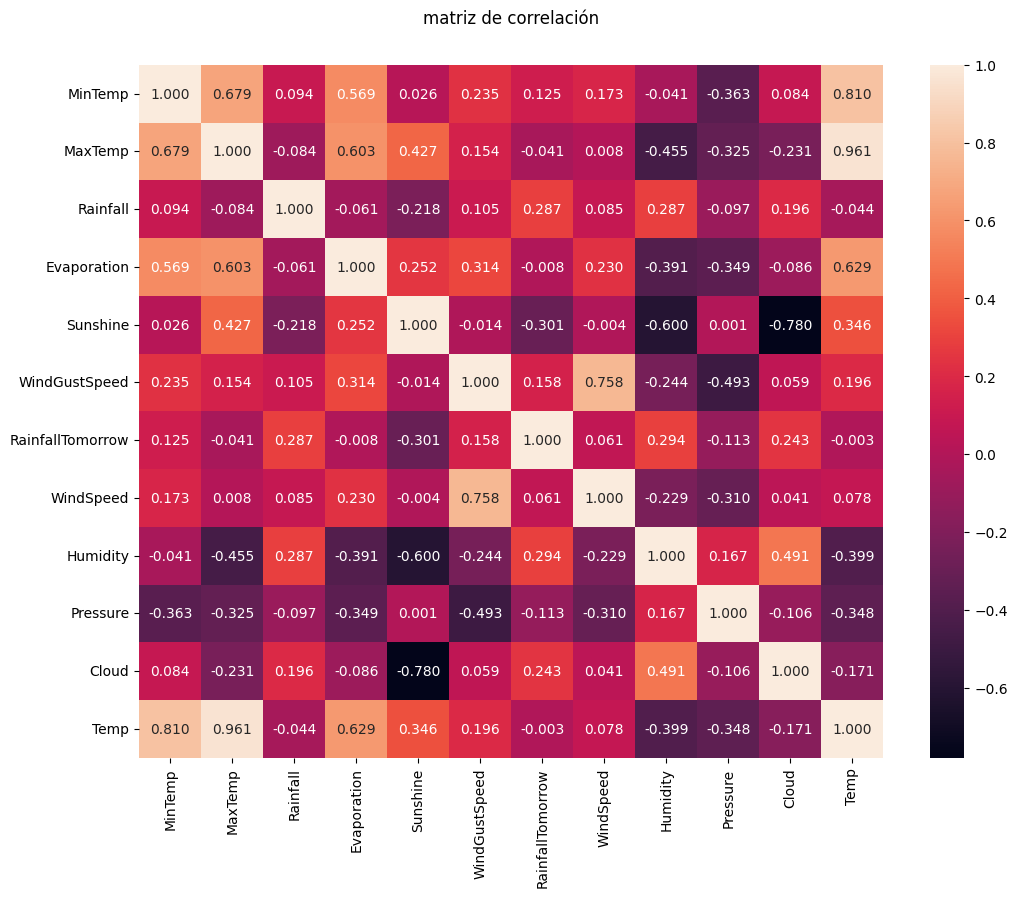

In [67]:
plot_matriz_temperatura (data_modelo)

En base a la matriz de correlación optamos por sacar las columnas (1)"Evaportion", (2)"Sunshine", (3)"WindGustSpeed", (4)"WindGustDir" y (5)"WindDir9am", en base a los siguientes criterios:

 (1)tiene casi 0 correlación lineal contra "RainfallTomorrow".

 (2)tiene una una alta correlación negativa contra "Humidity".

 (3)tiene alta correlación positiva con "WindSpeed".

 (4) y (5) nos quedamos con "WindDir3pm" porque pensamos que al ser la última es la que más se acerca al día siguiente.

 De este modo resolvemos el problema de los NaN para estas columnas y simplificamos el modelo al sacarle variables.  

In [68]:
data_modelo = data_modelo.drop(['Evaporation', 'Sunshine', 'WindGustSpeed', 'WindGustDir', 'WindDir9am'], axis=1)

In [69]:
data_modelo

,Date,MinTemp,MaxTemp,Rainfall,WindDir3pm,RainToday,RainTomorrow,RainfallTomorrow,WindSpeed,Humidity,Pressure,Cloud,Temp
0,2009-01-01,11.2,19.9,0.0,SW,No,Yes,1.2,38.0,46.0,1005.75,7.0,17.00
1,2009-01-02,7.8,17.8,1.2,SSE,Yes,No,0.0,28.5,46.5,1018.65,6.5,14.15
2,2009-01-03,6.3,21.1,0.0,S,No,No,0.0,16.0,43.0,1019.20,4.0,16.50
3,2009-01-04,8.1,29.2,0.0,SSE,No,No,0.0,11.0,45.0,1014.50,4.5,22.10
4,2009-01-05,9.7,29.0,0.0,SSE,No,No,0.0,14.5,41.0,1011.10,4.0,23.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15981,2017-06-20,11.3,20.0,4.4,SSW,Yes,No,0.0,14.0,74.0,1026.95,3.5,15.80
15982,2017-06-21,8.6,19.6,0.0,SSE,No,No,0.0,21.0,62.5,1025.60,2.0,14.20
15983,2017-06-22,9.3,19.2,0.0,ESE,No,No,0.0,13.5,65.5,1026.55,2.0,14.85
15984,2017-06-23,9.4,17.7,0.0,N,No,No,0.0,14.0,70.5,1017.90,6.0,13.75


In [70]:
data_modelo.isna().sum()

Date                  0
MinTemp               0
MaxTemp               0
Rainfall              0
WindDir3pm            1
RainToday             0
RainTomorrow          0
RainfallTomorrow      0
WindSpeed             0
Humidity              0
Pressure              0
Cloud               779
Temp                  0
dtype: int64

Aún quedan algunos NaN. Eliminamos primero la fila completa de WindDir3pm, dado que es un sólo registro el que tiene NaN. Luego, para Cloud, reemplazamos los valores faltantes por la media.



In [71]:
#eliminamos los NaN WindDir3pm
data_modelo = data_modelo.dropna(subset=['WindDir3pm'])

#Reemplazamos por la media los NaN en Cloud
media_cloud = data_modelo['Cloud'].mean()
data_modelo['Cloud'].fillna(media_cloud, inplace=True)

In [72]:
data_modelo.isna().sum()

Date                0
MinTemp             0
MaxTemp             0
Rainfall            0
WindDir3pm          0
RainToday           0
RainTomorrow        0
RainfallTomorrow    0
WindSpeed           0
Humidity            0
Pressure            0
Cloud               0
Temp                0
dtype: int64

Modificamos el nombre de WindDir3pm y los valores bajo el criterio de que si la cadena de texto empieza con N, O, S y E, que el valor del registro sea esa misma letra según corresponda. Esto es para simplificar la variable categórica que luego tendremos que pasar a dummies.

In [73]:
#Nos quedamos con la primera leta del strig WinDir3pm
data_modelo['WindDir'] = data_modelo['WindDir3pm'].apply(lambda x: x[0] if isinstance(x, str) and len(x) > 0 else x)

In [74]:
data_modelo

,Date,MinTemp,MaxTemp,Rainfall,WindDir3pm,RainToday,RainTomorrow,RainfallTomorrow,WindSpeed,Humidity,Pressure,Cloud,Temp,WindDir
0,2009-01-01,11.2,19.9,0.0,SW,No,Yes,1.2,38.0,46.0,1005.75,7.0,17.00,S
1,2009-01-02,7.8,17.8,1.2,SSE,Yes,No,0.0,28.5,46.5,1018.65,6.5,14.15,S
2,2009-01-03,6.3,21.1,0.0,S,No,No,0.0,16.0,43.0,1019.20,4.0,16.50,S
3,2009-01-04,8.1,29.2,0.0,SSE,No,No,0.0,11.0,45.0,1014.50,4.5,22.10,S
4,2009-01-05,9.7,29.0,0.0,SSE,No,No,0.0,14.5,41.0,1011.10,4.0,23.25,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15981,2017-06-20,11.3,20.0,4.4,SSW,Yes,No,0.0,14.0,74.0,1026.95,3.5,15.80,S
15982,2017-06-21,8.6,19.6,0.0,SSE,No,No,0.0,21.0,62.5,1025.60,2.0,14.20,S
15983,2017-06-22,9.3,19.2,0.0,ESE,No,No,0.0,13.5,65.5,1026.55,2.0,14.85,E
15984,2017-06-23,9.4,17.7,0.0,N,No,No,0.0,14.0,70.5,1017.90,6.0,13.75,N


Trasformamos el nombre de la columna Date en Estación, para luego pasar la fecha a las cuatro estaciones del años: primavera, otroño, ivierno, verano y otra vez primavera.

In [75]:
#Llamamos a la función correpondiente para introducir en data_modelo las estaciones de acuerdo a la fecha
data_modelo['Estacion'] = data_modelo['Date'].apply(obtener_estacion)

#Eliminamos la columna Date de data_modelo
data_modelo = data_modelo.drop(['Date'], axis=1)

In [76]:
data_modelo

,MinTemp,MaxTemp,Rainfall,WindDir3pm,RainToday,RainTomorrow,RainfallTomorrow,WindSpeed,Humidity,Pressure,Cloud,Temp,WindDir,Estacion
0,11.2,19.9,0.0,SW,No,Yes,1.2,38.0,46.0,1005.75,7.0,17.00,S,Verano
1,7.8,17.8,1.2,SSE,Yes,No,0.0,28.5,46.5,1018.65,6.5,14.15,S,Verano
2,6.3,21.1,0.0,S,No,No,0.0,16.0,43.0,1019.20,4.0,16.50,S,Verano
3,8.1,29.2,0.0,SSE,No,No,0.0,11.0,45.0,1014.50,4.5,22.10,S,Verano
4,9.7,29.0,0.0,SSE,No,No,0.0,14.5,41.0,1011.10,4.0,23.25,S,Verano
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15981,11.3,20.0,4.4,SSW,Yes,No,0.0,14.0,74.0,1026.95,3.5,15.80,S,Invierno
15982,8.6,19.6,0.0,SSE,No,No,0.0,21.0,62.5,1025.60,2.0,14.20,S,Invierno
15983,9.3,19.2,0.0,ESE,No,No,0.0,13.5,65.5,1026.55,2.0,14.85,E,Invierno
15984,9.4,17.7,0.0,N,No,No,0.0,14.0,70.5,1017.90,6.0,13.75,N,Invierno


Ahora generamos las variables dummies para el data_modelo de las variables categóricas

In [77]:
for i in ['Estacion', 'WindDir3pm', 'RainToday','RainTomorrow']:
  #generamos una instancia de la clase TratamiendoDeDatos
  dummies= TratamientoDeDatos(data_modelo)

  columna = [i]

  #aplicamos a la instancia de la clase generada el método correspondiente
  data_modelo = dummies.convertir_a_dummies(columna)

data_modelo

,MinTemp,MaxTemp,Rainfall,RainfallTomorrow,WindSpeed,Humidity,Pressure,Cloud,Temp,WindDir,...,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes,RainTomorrow_No,RainTomorrow_Yes
0,11.2,19.9,0.0,1.2,38.0,46.0,1005.75,7.0,17.00,S,...,0,0,1,0,0,0,1,0,0,1
1,7.8,17.8,1.2,0.0,28.5,46.5,1018.65,6.5,14.15,S,...,1,0,0,0,0,0,0,1,1,0
2,6.3,21.1,0.0,0.0,16.0,43.0,1019.20,4.0,16.50,S,...,0,0,0,0,0,0,1,0,1,0
3,8.1,29.2,0.0,0.0,11.0,45.0,1014.50,4.5,22.10,S,...,1,0,0,0,0,0,1,0,1,0
4,9.7,29.0,0.0,0.0,14.5,41.0,1011.10,4.0,23.25,S,...,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15981,11.3,20.0,4.4,0.0,14.0,74.0,1026.95,3.5,15.80,S,...,0,1,0,0,0,0,0,1,1,0
15982,8.6,19.6,0.0,0.0,21.0,62.5,1025.60,2.0,14.20,S,...,1,0,0,0,0,0,1,0,1,0
15983,9.3,19.2,0.0,0.0,13.5,65.5,1026.55,2.0,14.85,E,...,0,0,0,0,0,0,1,0,1,0
15984,9.4,17.7,0.0,0.0,14.0,70.5,1017.90,6.0,13.75,N,...,0,0,0,0,0,0,1,0,1,0


Eliminamos las columnas dummies redundantes, dado que one hot ecoding funciona con n-1 columnas para los modelos a utilizar

In [78]:
for i in ['Estacion_Verano', 'WindDir3pm_E', 'RainToday_No','RainTomorrow_No']:
  #generamos una instancia de la clase TratamiendoDeDatos
  dropear= TratamientoDeDatos(data_modelo)

  columna = [i]

  #aplicamos a la instancia de la clase generada el método correspondiente
  data_modelo = dropear.eliminar_columna(columna)

data_modelo

,MinTemp,MaxTemp,Rainfall,RainfallTomorrow,WindSpeed,Humidity,Pressure,Cloud,Temp,WindDir,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes,RainTomorrow_Yes
0,11.2,19.9,0.0,1.2,38.0,46.0,1005.75,7.0,17.00,S,...,0,0,0,0,1,0,0,0,0,1
1,7.8,17.8,1.2,0.0,28.5,46.5,1018.65,6.5,14.15,S,...,0,0,1,0,0,0,0,0,1,0
2,6.3,21.1,0.0,0.0,16.0,43.0,1019.20,4.0,16.50,S,...,1,0,0,0,0,0,0,0,0,0
3,8.1,29.2,0.0,0.0,11.0,45.0,1014.50,4.5,22.10,S,...,0,0,1,0,0,0,0,0,0,0
4,9.7,29.0,0.0,0.0,14.5,41.0,1011.10,4.0,23.25,S,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15981,11.3,20.0,4.4,0.0,14.0,74.0,1026.95,3.5,15.80,S,...,0,0,0,1,0,0,0,0,1,0
15982,8.6,19.6,0.0,0.0,21.0,62.5,1025.60,2.0,14.20,S,...,0,0,1,0,0,0,0,0,0,0
15983,9.3,19.2,0.0,0.0,13.5,65.5,1026.55,2.0,14.85,E,...,0,0,0,0,0,0,0,0,0,0
15984,9.4,17.7,0.0,0.0,14.0,70.5,1017.90,6.0,13.75,N,...,0,0,0,0,0,0,0,0,0,0


Para mayor comodidad interpretativa, eliminamos la partícula "_Yes" de variables RainToday_Yes y RainTomorrow_Yes.


In [79]:
data_modelo['RainToday'] = data_modelo['RainToday_Yes']
data_modelo['RainTomorrow'] = data_modelo['RainTomorrow_Yes']

# 5) TRATAMIENTO DE OUTLIERS

Sabemos que los modelos de regresión lineal son sesibles a la presencia de outliers. Se nos ocurre sacar los outliers muy extremos, aquellos que se alejan de la media en más de 4 desviaciones estándar. Para ellos normalizamos el dataframe.

In [80]:
#guardamos el data_modelo sin normalizar
data_modelo.to_csv('data_modelo.csv', index=False)

#generamos un dataframe de outlier para trabajar con ellos
data_outlier = data_modelo

Normalizamos data_outlier

In [81]:
#generamos una instancia de la clase TratamiendoDeDatos
x = TratamientoDeDatos(data_outlier)

#utllizamos el método de estandarización de la clase
data_outlier_normal = x.estandarizar_col_num()


In [82]:
#Nos quedamos con las columnas que nos interesan
data_outlier_normal = data_outlier_normal.iloc[:, :9]
data_outlier_normal

,MinTemp,MaxTemp,Rainfall,RainfallTomorrow,WindSpeed,Humidity,Pressure,Cloud,Temp
0,-0.065624,-0.305383,-0.311238,-0.146786,2.197226,-0.952230,-1.578088,0.975393,-0.161493
1,-0.649831,-0.650138,-0.146923,-0.311118,1.091059,-0.918338,0.200750,0.756585,-0.683672
2,-0.907569,-0.108380,-0.311238,-0.311118,-0.364423,-1.155578,0.276591,-0.337457,-0.253103
3,-0.598283,1.221389,-0.311238,-0.311118,-0.946617,-1.020012,-0.371512,-0.118649,0.772932
4,-0.323362,1.188555,-0.311238,-0.311118,-0.539081,-1.291143,-0.840353,-0.337457,0.983636
...,...,...,...,...,...,...,...,...,...
15981,-0.048441,-0.288966,0.291252,-0.311118,-0.597301,0.945687,1.345273,-0.556266,-0.381358
15982,-0.512370,-0.354634,-0.311238,-0.311118,0.217770,0.166185,1.159115,-1.212691,-0.674511
15983,-0.392092,-0.420302,-0.311238,-0.311118,-0.655520,0.369533,1.290115,-1.212691,-0.555417
15984,-0.374910,-0.666555,-0.311238,-0.311118,-0.597301,0.708447,0.097329,0.537776,-0.756960


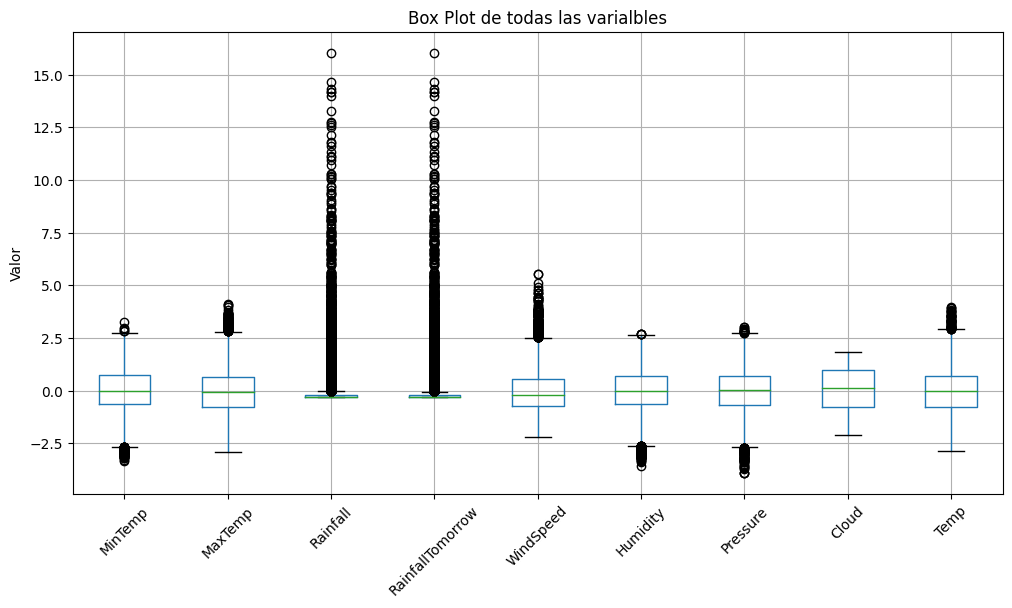

In [83]:
plot_boxplot(data_outlier_normal)

In [84]:
# Creamos un DataFrame vacío con las mismas columnas e índices que el original
outlier_df = pd.DataFrame(index=data_outlier_normal.index, columns=data_outlier_normal.columns)

# Iteramos a través de las columnas
for columna in data_outlier_normal.columns:
    media = data_outlier_normal[columna].mean()
    std_dev = data_outlier_normal[columna].std()

    # Identificamos los valores que están a más de 4.0 desviaciones estándar de la media
    outliers_columna = data_outlier_normal[abs(data_outlier_normal[columna] - media) > 4* std_dev]

    # Asignamos los valores extremos al nuevo DataFrame
    outlier_df[columna].loc[outliers_columna.index] = data_outlier_normal[columna].loc[outliers_columna.index]

# Muestra el nuevo DataFrame con los valores extremos y NaN en los otros lugares
outlier_df.describe()

,MinTemp,MaxTemp,Rainfall,RainfallTomorrow,WindSpeed,Humidity,Pressure,Cloud,Temp
count,0,3.000000,204.000000,204.000000,22.000000,0,0,0,0
unique,0,2.000000,130.000000,130.000000,10.000000,0,0,0,0
top,NaN,4.045097,4.207435,4.207999,4.351341,NaN,NaN,NaN,NaN
freq,NaN,2.000000,5.000000,5.000000,4.000000,NaN,NaN,NaN,NaN


In [85]:
outlier_df.tail()

,MinTemp,MaxTemp,Rainfall,RainfallTomorrow,WindSpeed,Humidity,Pressure,Cloud,Temp
15981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
# Calculamos el número de valores no nulos en cada columna
len_por_columna = outlier_df.count()

# Muestramos el resultado
print(len_por_columna)

MinTemp               0
MaxTemp               3
Rainfall            204
RainfallTomorrow    204
WindSpeed            22
Humidity              0
Pressure              0
Cloud                 0
Temp                  0
dtype: int64


In [87]:
indices_con_valores = []

# Iteramos a través de las filas del DataFrame
for indx , row in outlier_df.iterrows():
    if row.notna().any():
        indices_con_valores.append(indx)

# La lista 'indices_con_valores' ahora contiene los índices de las filas que cumplen la condición
print(indices_con_valores)
print(len(indices_con_valores))

[37, 191, 226, 253, 272, 324, 325, 429, 430, 667, 668, 699, 700, 764, 765, 970, 971, 1029, 1030, 1451, 1494, 1522, 1523, 1592, 2007, 2055, 2056, 2460, 2461, 2742, 2749, 2830, 2831, 2931, 2932, 3172, 3173, 3229, 3383, 3418, 3445, 3464, 3516, 3517, 3598, 3599, 3621, 3622, 3859, 3860, 3956, 3957, 3958, 3959, 4162, 4163, 4221, 4222, 4223, 4236, 4237, 4252, 4253, 4404, 4405, 4643, 4686, 4714, 4715, 4716, 4717, 4784, 4831, 4832, 5199, 5247, 5248, 5249, 5652, 5653, 6060, 6061, 6202, 6203, 6607, 6608, 6622, 6623, 7035, 7036, 7037, 7080, 7081, 7185, 7186, 7277, 7278, 7323, 7324, 7327, 7328, 7333, 7334, 7389, 7390, 7391, 7392, 7555, 7556, 7655, 7656, 7751, 7752, 7754, 7755, 7976, 7977, 8052, 8053, 8257, 8258, 8313, 8314, 8413, 8414, 8703, 8704, 8738, 8739, 8825, 8826, 9250, 9251, 9339, 9340, 9678, 9679, 9724, 9725, 9737, 9738, 9915, 9932, 9933, 10036, 10037, 10137, 10138, 10304, 10305, 10307, 10308, 10442, 10443, 10484, 10485, 10534, 10535, 10536, 10537, 10538, 10660, 10661, 10679, 10680, 10713,

En data_modelo (que aún no hemos normalizado) borramos los 396 registros con outliers dado que no hemos eliminado una sola fila en todo el tratamiento de datos. Fijémonos que justo los outliers corresponden a las variables a predecir. Por lo que tomamos la decisión de que nuestro modelo, no será robusto a la presencia de outliers.  

In [88]:
#volvermos a abrir eldata_modelo sin normalizar
data_modelo = pd.read_csv('data_modelo.csv')

In [89]:
# Borramos las filas correspondientes en el DataFrame df_std
data_modelo = data_modelo.drop(indices_con_valores).reset_index(drop=True)

In [90]:
data_modelo.tail()

,MinTemp,MaxTemp,Rainfall,RainfallTomorrow,WindSpeed,Humidity,Pressure,Cloud,Temp,WindDir,...,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes,RainTomorrow_Yes,RainToday,RainTomorrow
15584,11.3,20.0,4.4,0.0,14.0,74.0,1026.95,3.5,15.80,S,...,0,1,0,0,0,0,1,0,1,0
15585,8.6,19.6,0.0,0.0,21.0,62.5,1025.60,2.0,14.20,S,...,1,0,0,0,0,0,0,0,0,0
15586,9.3,19.2,0.0,0.0,13.5,65.5,1026.55,2.0,14.85,E,...,0,0,0,0,0,0,0,0,0,0
15587,9.4,17.7,0.0,0.0,14.0,70.5,1017.90,6.0,13.75,N,...,0,0,0,0,0,0,0,0,0,0
15588,10.1,19.3,0.0,0.0,18.0,45.5,1016.20,3.5,15.70,W,...,0,0,0,1,0,0,0,0,0,0


# 5) DIVISIÓN EN TRIAN Y TEST PARA REGRESIÓN Y CLASIFICACIÓN

Hacemos la división de data_modelo para regresión

---



In [91]:
# Obtenemos las variables independientes (X) y la variable dependiente (y)

X_reg = data_modelo[['Humidity', 'Pressure','Cloud','MinTemp','MaxTemp','Rainfall', 'WindSpeed', 'Temp', 'WindDir3pm_N','WindDir3pm_S','WindDir3pm_W', 'Estacion_Otoño', 'Estacion_Primavera','Estacion_Invierno', 'RainToday']]
y_reg = data_modelo['RainfallTomorrow']

Hacemos la devisión en train y test para regresión

In [92]:
X_train_reg, x_test_reg, Y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

Hecemos la división de data:modelo para clasificación

In [93]:
X_cla = data_modelo[['Humidity', 'Pressure','Cloud','MinTemp','MaxTemp','Rainfall', 'WindSpeed', 'Temp', 'WindDir3pm_N','WindDir3pm_S','WindDir3pm_W', 'Estacion_Otoño', 'Estacion_Primavera','Estacion_Invierno', 'RainToday']]
y_cla = data_modelo['RainTomorrow']

Hacemos la devisión en train y test para clasificación

In [94]:
X_train_cla, x_test_cla, Y_train_cla, y_test_cla = train_test_split(X_cla, y_cla, test_size=0.2, random_state=42)

# 6) BALANCEO Y NORMALIZACIÓN DEL DATASET

Observamos que tan desbalanciado está data_modelo repecto de los días que llovieron y los que no.

In [95]:
data_modelo.groupby('RainTomorrow').describe()

MinTemp                                                   \
                count       mean       std  min  25%   50%   75%   max   
RainTomorrow                                                             
0             12097.0  11.177474  5.903676 -8.0  7.5  11.2  15.4  30.5   
1              3492.0  12.711369  5.466333 -4.9  8.8  12.6  17.1  28.8   

              MaxTemp             ... RainTomorrow_Yes      RainToday  \
                count       mean  ...              75%  max     count   
RainTomorrow                      ...                                   
0             12097.0  22.091386  ...              0.0  0.0   12097.0   
1              3492.0  20.668442  ...              1.0  1.0    3492.0   

                                                           
                  mean       std  min  25%  50%  75%  max  
RainTomorrow                                               
0             0.166570  0.372607  0.0  0.0  0.0  0.0  1.0  
1             0.402635  0.490499  0.0  0.0  0.0  1.0  1.0  

[2 rows x 240 columns]

In [96]:
print("Conteo de clases antes de aplicar SMOTE:")
print(data_modelo['RainTomorrow'].value_counts())

Conteo de clases antes de aplicar SMOTE:
0    12097
1     3492
Name: RainTomorrow, dtype: int64


Se aprecia el el dataset está desbalanceado. Para ello, aplicamos una ténica de oversampling con SMOTE, pero sólo sobre los conjutos de Test de clasificación

In [97]:
x_smoth = X_train_cla
y_smoth = Y_train_cla

In [98]:
# Aplicamos SMOTE para equilibrar las clases de clasificación
smote = SMOTE(sampling_strategy='auto', random_state=42)

X_train_cla, Y_train_cla  = smote.fit_resample(x_smoth, y_smoth)

In [99]:
X_train_cla


,Humidity,Pressure,Cloud,MinTemp,MaxTemp,Rainfall,WindSpeed,Temp,WindDir3pm_N,WindDir3pm_S,WindDir3pm_W,Estacion_Otoño,Estacion_Primavera,Estacion_Invierno,RainToday
0,73.000000,1006.600000,8.000000,9.700000,16.100000,5.400000,32.000000,13.000000,0,0,0,0,1,0,1
1,70.500000,1015.150000,7.500000,7.200000,12.200000,0.200000,15.000000,9.800000,0,0,0,0,0,1,0
2,70.500000,1034.950000,8.000000,-3.100000,14.700000,0.000000,9.500000,8.850000,0,0,0,1,0,0,0
3,45.000000,1013.650000,4.000000,13.800000,26.500000,0.000000,13.000000,20.950000,0,0,0,1,0,0,0
4,53.500000,1029.400000,1.000000,6.500000,22.400000,0.000000,15.500000,14.900000,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19387,49.073522,1008.967661,7.525214,14.176503,29.561748,0.000000,16.794088,23.201440,0,0,0,0,0,0,0
19388,92.842472,1030.614405,7.157528,12.863011,15.324629,2.504090,9.212360,14.022584,0,0,0,0,0,1,1
19389,49.476328,1018.233573,5.428983,11.285797,16.966859,1.276328,30.690819,14.516859,0,0,0,0,0,0,0
19390,74.771941,1018.033311,7.257314,8.317553,16.125133,0.000000,6.014628,12.242686,0,0,0,0,0,0,0


In [100]:
Y_train_cla

0        0
1        1
2        0
3        1
4        0
        ..
19387    1
19388    1
19389    1
19390    1
19391    1
Name: RainTomorrow, Length: 19392, dtype: int64

In [101]:
print("Conteo de clases después de aplicar SMOTE:")
print(Y_train_cla.value_counts())

Conteo de clases después de aplicar SMOTE:
0    9696
1    9696
Name: RainTomorrow, dtype: int64


Como puede apreciarse, las clases se han balanceado. Ahora pasamos a normalizar los conjunto de train tanto para regresión como para clasificación.

In [102]:
#generamos una instancia de la clase TratamiendoDeDatos para X_train_reg
x = TratamientoDeDatos(X_train_reg)

#utllizamos el método de estandarización de la clase para X_train_reg
X_train_reg = x.estandarizar_col_num()


In [103]:

#generamos una instancia de la clase TratamiendoDeDatos para x_train_reg
x = TratamientoDeDatos(x_test_reg)

#utllizamos el método de estandarización de la clase para x_train_reg
x_train_reg = x.estandarizar_col_num()


In [104]:
X_train_reg

,Humidity,Pressure,Cloud,MinTemp,MaxTemp,Rainfall,WindSpeed,Temp,WindDir3pm_N,WindDir3pm_S,WindDir3pm_W,Estacion_Otoño,Estacion_Primavera,Estacion_Invierno,RainToday
9248,0.910562,-1.482409,1.427180,-0.308258,-0.924703,0.888110,1.530351,-0.886979,0,0,0,0,1,0,1
219,0.738447,-0.297747,1.208469,-0.736692,-1.566186,-0.332005,-0.483273,-1.473227,0,0,0,0,0,1,0
7726,0.738447,2.445680,1.427180,-2.501838,-1.154979,-0.378933,-1.134739,-1.647269,0,0,0,1,0,0,0
59,-1.017136,-0.505583,-0.322506,0.394373,0.785920,-0.378933,-0.720170,0.569480,0,0,0,1,0,0,0
14596,-0.431942,1.676689,-1.634771,-0.856653,0.111540,-0.378933,-0.424049,-0.538894,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,1.805565,-1.246862,1.427180,0.394373,-0.628633,3.093704,1.056557,-0.465613,0,0,0,0,0,0,1
13418,0.084406,-0.089912,-1.634771,0.994180,0.489851,-0.378933,-0.364824,0.871764,0,0,0,0,0,0,0
5390,0.772870,0.401965,-0.103796,-0.668142,-0.891806,-0.238150,-0.068703,-0.832018,0,0,0,0,0,1,0
860,1.048255,1.413431,-1.416060,-0.308258,-0.924703,-0.378933,1.234230,-0.850339,1,0,0,0,0,1,0


In [105]:
#generamos una instancia de la clase TratamiendoDeDatos para X_train_cla
x = TratamientoDeDatos(X_train_cla)

#utllizamos el método de estandarización de la clase para X_train_cla
X_train_cla = x.estandarizar_col_num()

In [106]:
#generamos una instancia de la clase TratamiendoDeDatos para x_train_cla
x = TratamientoDeDatos(x_test_cla)

#utllizamos el método de estandarización de la clase para x_train_cla
x_train_cla = x.estandarizar_col_num()

# 7) MODELOS BASE

Generamos dos modelos bases, uno para regresión y otro para clasificación, con el fin de poder "ganarles" en la performance de los que generemos a continuación.

Comenzamos por un modelo base de REGRESIÓN y obtenemos el MSE como métrica.


In [107]:
# Calculamos la media de la variable de salida
media_real = np.mean(y_reg)

# Creamos un modelo base que predice la media
modelo_media = np.full_like(y_test_reg, media_real)

# Calculamos el error cuadrático medio (MSE) para el modelo de media
mse_media = mean_squared_error(y_test_reg, modelo_media)


print(f'Modelo de Media - MSE: {round(mse_media, 4)}')

Modelo de Media - MSE: 39.772


El error obtenido es muy grande. El modelo base está errando en la predicción casi por 40 ml, esto son 40 litros por metro cúbico. Es a esta métrica de MSE deberíamos "ganarle".

Ahora generamos un modelo base de CLASIFICACIÓN y obtenemos como métricas accuracy y ploteamos una matriz de confusión.  

In [108]:
# Creamos un clasificador aleatorio
classifier = DummyClassifier(strategy='uniform', random_state=42)

# Entrenamos el clasificador
classifier.fit(X_train_cla, Y_train_cla)

# Realizamos predicciones en el conjunto de prueba
y_pred = classifier.predict(x_test_cla)

# Calculamos la precisión del clasificador aleatorio
accuracy = accuracy_score(y_test_cla, y_pred)

# Imprimimos la precisión y la matriz de confusión
print(f'Precisión del Clasificador Aleatorio: {round(accuracy, 4)}')


Precisión del Clasificador Aleatorio: 0.5157


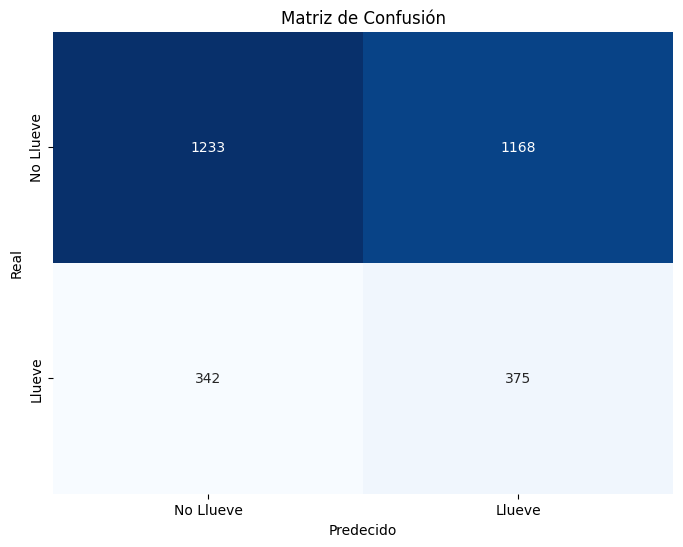

In [109]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test_cla, y_pred)

# Clases para las etiquetas del gráfico
clases = ['No Llueve', 'Llueve']

# Plotear la matriz de confusión como un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=clases, yticklabels=clases, cbar=False)
plt.xlabel('Predecido')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

El modelo base de clasificación arroja un accuracy de 0.5157, lo que indica la proporción de aciertos sobre el total de datos, y se denota que para cada clase, práticamente, acierta tanto como erra: esto es una cantidad de FP y FN repecto de los VP, para cada clase. A la métrica de accuray y matriz de confusión obtenida también debiéramos "ganarle".

# 8) MODELO DE REGRESIÓN LIENAL

In [110]:
# Generamos el modelo de regresión lineal
regressor = LinearRegression()

# Entrenamos al modelo con los datos de entrenamiento
regressor.fit(X_train_reg, Y_train_reg)

# Realizamos las predicciones con los datos de prueba
Y_pred = regressor.predict(x_test_reg)

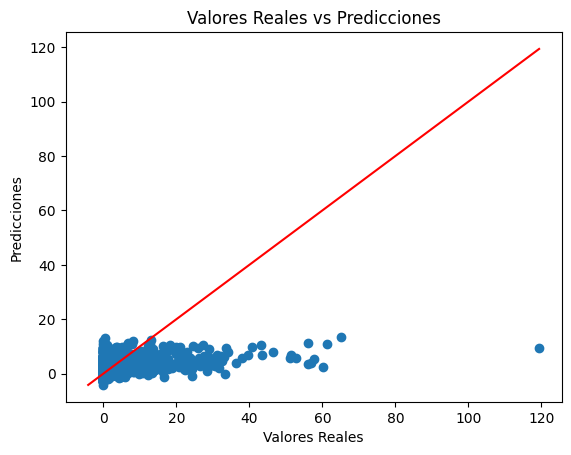

In [111]:
plot_predict_lienal (y_test_reg, Y_pred)

El gráfico muestra los valores reales de la variable dependiente (conjunto de prueba, puntos azules) contra los predichos por el modelo (conjunto de entrenamiento, linea roja). Si los puntos copiaran la pendiente de la recta, nuestro modelo sería perfecto (predicción = realidad). Se puede apreciar que éste no es el caso dado que muchos puntos se alejan de la recta.

Uno de los modos de evaluar el error es mediante un gráfico representado por los residuos contra las predicciones del modelo.

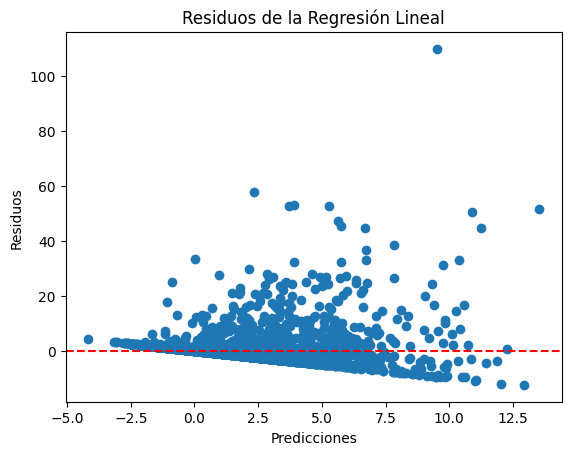

In [112]:
plot_residuos_lineal (y_test_reg, Y_pred)

El gráfico muestra un sesgo a la sobrestimación de la variable dependiente. Pero por sobre todo, una gran condensación de los puntos, cuando, la presentación optima debera ser un tanto más aleatoria y homogenea en su ditribución.    

In [113]:
# Añadimos una columna de unos a la matriz de variables independientes para incluir el término constante
X_train = sm.add_constant(X_train_reg)

# Creamos una instancia del modelo de regresión
model = sm.OLS(Y_train_reg, X_train)
# Ajustamos el modelo a los datos de entrenamiento
results = model.fit()
# Calculamos y mostramos los coeficientes de la regresión
print('Coeficientes:', regressor.coef_)
print("")
print('Intercepto:', round(regressor.intercept_, 4))
print("")


print("#### LAS MÉTRICAS SEGÚN EL MÉTODO DE REGRESIÓN LIENEAL SON:")
print('')
# Calculamos y mostramos el Mean Squared Error (MSE)
mse = mean_squared_error(y_test_reg, Y_pred)
print(f"Mean Squared Error (MSE): {round(mse, 4)}")
print("")

# Calculamos y mostramos el Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {round(rmse, 4)}")
print("")

# Calculamos y mostramos el Mean Absolute Error (MAE) con 4 decimales
mae = mean_absolute_error(y_test_reg, Y_pred)
print(f"Mean Absolute Error (MAE): {round(mae, 4)}")
print("")

# Calculamos y mostramos el coeficiente de determinación (R²) con 4 decimales
r2 = regressor.score(x_test_reg, y_test_reg)
print('R²:', round(r2, 4))
print("")



Coeficientes: [ 1.76096475 -0.53708822  0.6000276  -0.1299717  -0.60017677  0.97451102
  0.30566227  1.57303358 -0.02098362 -0.26461218  0.30064708  0.72173759
  0.95241364  1.06931695 -0.45657247]

Intercepto: 1.407

#### LAS MÉTRICAS SEGÚN EL MÉTODO DE REGRESIÓN LIENEAL SON:

Mean Squared Error (MSE): 33.8282

Root Mean Squared Error (RMSE): 5.8162

Mean Absolute Error (MAE): 2.8375

R²: 0.1493



R²: establece que el modelo explica el 14,93% de la variación total de la variable dependiente. Si interpretamos el MAE y el RMSE, métricas que se encuentran en las mismas unidades de la variable dependiente, se aprecia que el MAE, error absoluto medio es de 2.8375, y el RMSE, de 5.8162. La métricas denotan una mala performance, tanto el R², como aquellas interpretables en las mismas unidades de la variable dependiente, de las cuales, en el mejor de los casos (MAE) le erramos a la predicción de lluvia en promedio unos 2.8354 milímetros, esto es, casi 3 litros de agua por metro cúbico.

In [114]:
# Realizamos la validación cruzada
Y_pred_cross_val = cross_val_predict(regressor, X_train_reg, Y_train_reg, cv=5)  # Puedes ajustar el número de divisiones (cv) según tus necesidades

# Evaluamos el rendimiento en validación cruzada (por ejemplo, usando el error cuadrático medio)
mse_cross_val = mean_squared_error(Y_train_reg, Y_pred_cross_val)
rmse_cross_val = np.sqrt(mse_cross_val)
mae_cross_val = mean_absolute_error(Y_train_reg, Y_pred_cross_val)
r2_cross_val = r2_score(Y_train_reg, Y_pred_cross_val)

print("#### LAS MÉTRICAS SEGÚN EL MÉTODO DE REGRESIÓN LIENEAL CON VALIDACIÓN CRUCADA (cv=5) SON:")
print('')
print(f"Mean Squared Error (MSE): {round(mse_cross_val, 4)}")
print('')
print(f"Root Mean Squared Error (RMSE): {round(rmse_cross_val, 4)}")
print("")
print(f"Mean Absolute Error (MAE): {round(mae, 4)}")
print("")
print('R²:', round(r2_cross_val, 4))
print("")

#### LAS MÉTRICAS SEGÚN EL MÉTODO DE REGRESIÓN LIENEAL CON VALIDACIÓN CRUCADA (cv=5) SON:

Mean Squared Error (MSE): 36.4916

Root Mean Squared Error (RMSE): 6.0408

Mean Absolute Error (MAE): 2.8375

R²: 0.1329



Las metétricas empeoran aplicando validación cruzada. En nuestra opinión, no lo hancen de modo significativo. Esto da cuenta que la división de train y test hechas en un principio no estan sesgadas al punto de distorsionar lo resultados del modelo. Recordemos que el método de valización cruzada no deja de ser una estimación.

# 10) EXPLICABILIDAD PARA MODELO DE REGRESIÓN LINEAL (SHAP)

Aplicamos SHAP para estimar cuánto contribuye las features de entrada a la diferencia entre la predicción del modelo y la salida esperada. Esto signfica establecer cuáles de la características explican mejor la predicción del modelo generado.

PermutationExplainer explainer: 3119it [01:13, 38.93it/s]                          


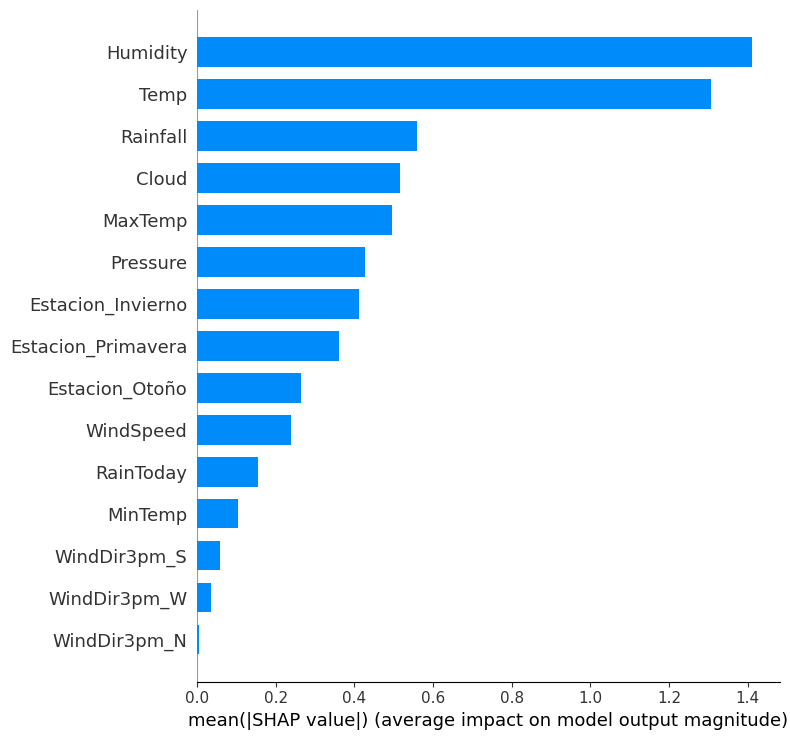

In [115]:
import shap
import matplotlib.pyplot as plt

# Crear un explainer SHAP
explainer = shap.Explainer(regressor.predict, X_train_reg)

# Obtener valores SHAP para las predicciones en el conjunto de prueba
shap_values = explainer.shap_values(x_test_reg)

# Mostrar el gráfico de barras horizontales
shap.summary_plot(shap_values, x_test_reg, feature_names=X_train_reg.columns, plot_type="bar")
plt.show()

Como podemos apreciar en el gráfico de barra, la dos variables que más explican la predicción de nuestro modelo son  "Humididy" y "Temp", al menos por el doble que el resto de las que intervienen.

# 11) MÉTODO DEL GRADIENTE DESCENDIENTE

Utilizamos el método del gradiente descendiente estocástico con validación cruzada cv = 5, optimizando los parámatreos de alpha y épocas.

In [116]:

# Creamos el modelo de regresión con gradiente descendente
regressor = SGDRegressor()

# Definimos el conjunto de parámetros para probar
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],  # Tasa de regularización
    'max_iter': [1000, 2000, 3000, 4000],  # Número de épocas
}

# Configurar GridSearchCV con el modelo, el conjunto de parámetros y la métrica de evaluación
grid_search = GridSearchCV(regressor, param_grid, scoring='neg_mean_squared_error', cv=5)

# Ajustamos el modelo a los datos de entrenamiento
grid_search.fit(X_train_reg, Y_train_reg)


# Obtenemos el mejor modelo entrenado
best_regressor = grid_search.best_estimator_


# Calculamos métricas adicionales utilizando los valores finales de la última época
final_prediction_train = best_regressor.predict(X_train_reg)
final_prediction_test = best_regressor.predict(x_test_reg)

mse_additional = mean_squared_error(y_test_reg, final_prediction_test)
rmse = np.sqrt(mse_additional)
mae = mean_absolute_error(y_test_reg, final_prediction_test)
r2 = r2_score(y_test_reg, final_prediction_test)

# Imprimimos métricas adicionales
print("#### LAS MÉTRICAS SEGÚN EL MÉTODO DEL DESCENSO DEL GRADIENTE SON:")
print('')
print(f"Mean Squared Error (MSE): {round(mse_additional, 4)}")
print('')
print(f"Root Mean Squared Error (RMSE): {round(rmse, 4)}")
print('')
print(f"Mean Absolute Error (MAE): {round(mae, 4)}")
print('')
print(f"R²: {round(r2, 4)}")
print('')

#### LAS MÉTRICAS SEGÚN EL MÉTODO DEL DESCENSO DEL GRADIENTE SON:

Mean Squared Error (MSE): 33.8916

Root Mean Squared Error (RMSE): 5.8216

Mean Absolute Error (MAE): 2.7528

R²: 0.1477



Con validación cruzada, optimización de parámetros y método del gradiente descendiente estocástico, la métricas han mejorado, aunque en nuestra opinión de modo despreciable.

# 12) REGULARIZACIÓN PARA REGRESIÓN LINEAL

Aplicamos regularización para aproximar a un mejor modelo reduciendo el impactos de los coeficiente menos significativos en la regresión. Para ello utilizamos ElasticNeT. Además, hacemos una optimización de hiperparámetros del modelo al implementarlo.

In [117]:

# Crearmos un modelo de regresión lineal con regularización Elastic Net
modelo_elastic_net = ElasticNet()

# Definimos el el grid de búsqueda de hisperparámetros
parametros = {
    'alpha': [0.001, 0.01, 0.1, 1.0],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1]
}

# Creamos un objeto GridSearchCV
grid_search = GridSearchCV(estimator=modelo_elastic_net, param_grid=parametros, scoring='neg_mean_squared_error', cv=5)

# Entrenamos el modelo
grid_search.fit(X_train_reg, Y_train_reg)

# Obtenemos los mejores hiperparámetros
mejor_alpha = grid_search.best_params_['alpha']
mejor_l1_ratio = grid_search.best_params_['l1_ratio']

# Creamos un nuevo modelo ElasticNet con los mejores hiperparámetros
modelo_elastic_net_final = ElasticNet(alpha=mejor_alpha, l1_ratio=mejor_l1_ratio)

# Ajustamos el modelo final a los datos de entrenamiento
modelo_elastic_net_final.fit(X_train_reg, Y_train_reg)

# Realizamos predicciones en los datos de prueba
y_pred_elastic_net_final = modelo_elastic_net_final.predict(x_test_reg)

# Evaluamos el rendimiento del modelo ElasticNet
mse_elastic_net_final = mean_squared_error(y_test_reg, y_pred_elastic_net_final)
rmse_elasti_net_final = np.sqrt(mse_elastic_net_final)
mae_elastic_net_final = mean_absolute_error(y_test_reg, y_pred_elastic_net_final)
r2_elastic_net_final = r2_score(y_test_reg, y_pred_elastic_net_final)

print("#### LOS MEJORES HIPERPARÁMETROS SON:")
print("")
print(f"Mejor alpha: {mejor_alpha}")
print("")
print(f"Mejor l1_ratio: {mejor_l1_ratio}")
print("")
print("#### LAS MÉTRICAS SEGÚN ELASTICNET CON MEJORES HIPERPARÁMETROS SON:")
print("")
print(f"Mean Squared Error (MSE): {round(mse_elastic_net_final, 4)}")
print("")
print(f"Root Mean Squared Error (RMSE): {round(rmse_elasti_net_final, 4)}")
print('')
print(f"Mean Absolute Error (MAE): {round(mae_elastic_net_final, 4)}")
print('')
print(f"R² : {round(r2_elastic_net_final, 4)}")

#### LOS MEJORES HIPERPARÁMETROS SON:

Mejor alpha: 0.001

Mejor l1_ratio: 0.1

#### LAS MÉTRICAS SEGÚN ELASTICNET CON MEJORES HIPERPARÁMETROS SON:

Mean Squared Error (MSE): 33.8244

Root Mean Squared Error (RMSE): 5.8159

Mean Absolute Error (MAE): 2.8365

R² : 0.1494


Con el método de regularización hemos mejorado las métricas por muy poco margen. Variando los hiperparámetros de ElasticNet, los mejores encontrados fueron los que se muestra, alpha de 0.001 y l1_ratio de 0.1. Este último hiperparámetro indica que el modelo utiliza para la regularización en un 90% Ridge, y en un 10%, Lasso. Ahora bien, consideramos que el valor de alpha es más importante, dado que controla la fuerza de la regularización global (combinación entre Ridge y Lasso). De todos los alpha, optó por el más pequeño, lo que indica que la regularización en el modelo no es muy fuerte y, en definitiva, poco necesaria.



# 13) REGRESIÓN LOGÍSTICA

Nos quedamos con las variables numéricas y sacamos las categóricas para hacer una evaluación de ellas

In [118]:
columnas = X_train_cla.columns.tolist()
print(columnas)

['Humidity', 'Pressure', 'Cloud', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindSpeed', 'Temp', 'WindDir3pm_N', 'WindDir3pm_S', 'WindDir3pm_W', 'Estacion_Otoño', 'Estacion_Primavera', 'Estacion_Invierno', 'RainToday']


In [119]:
columnas = X_train_cla.columns.tolist()
columnas = columnas[:8]
print(columnas)

['Humidity', 'Pressure', 'Cloud', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindSpeed', 'Temp']


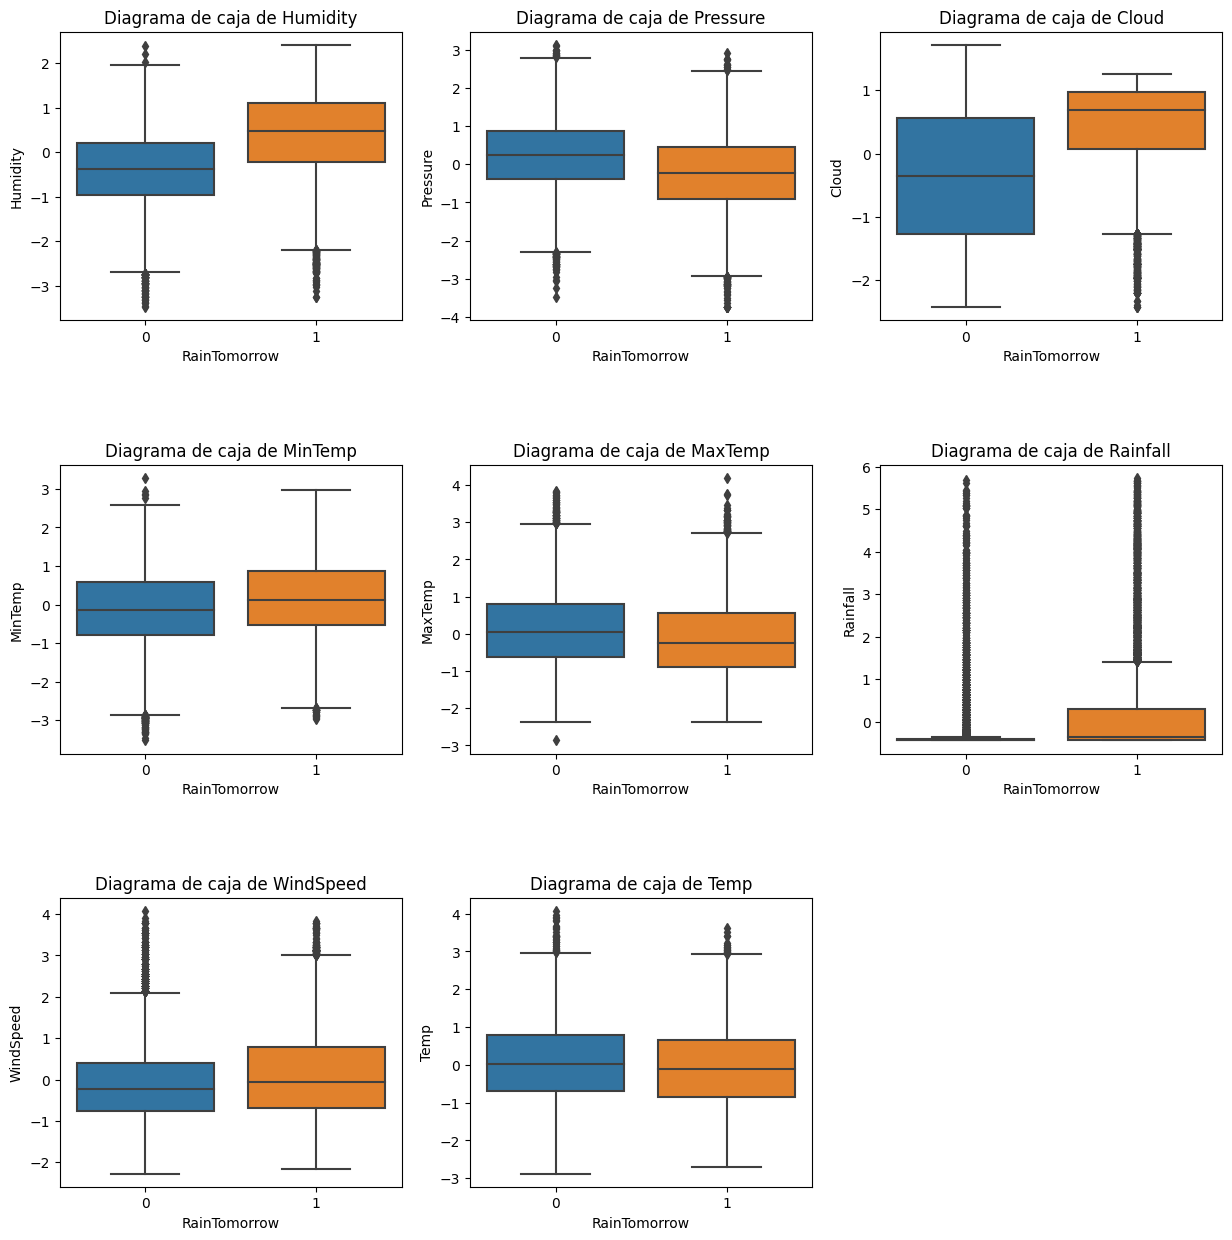

In [120]:
boxplots(X_train_cla, Y_train_cla, columnas)

En base a los boxplot anteriores, decidimos quedarnos sólo con 3 variables que son aquellas que mejor explican la pedicción categórica de si lloverá o no al día siguiente. Estas son "Cloud", "Rainfall" y "Pressure".

In [121]:


for i in ['MinTemp', 'MaxTemp', 'Rainfall', 'WindSpeed', 'Temp']:
  #generamos una instancia de la clase TratamiendoDeDatos
  dropear= TratamientoDeDatos(X_train_cla)

  columna = [i]

  #aplicamos a la instancia de la clase generada el método correspondiente
  X_train_cla = dropear.eliminar_columna(columna)




In [122]:

for i in ['MinTemp', 'MaxTemp', 'Rainfall', 'WindSpeed', 'Temp']:
  #generamos una instancia de la clase TratamiendoDeDatos
  dropear= TratamientoDeDatos(x_test_cla)

  columna = [i]

  #aplicamos a la instancia de la clase generada el método correspondiente
  x_test_cla = dropear.eliminar_columna(columna)


Generamos el modelo de regresión logística

In [123]:
logistic_model = LogisticRegression(random_state=10)
logistic_model.fit(X_train_cla, Y_train_cla)
y_pred = logistic_model.predict(x_test_cla)

print("Resultados con regresión logística\n")
print(classification_report(y_test_cla, y_pred))


Resultados con regresión logística

              precision    recall  f1-score   support

           0       0.89      0.65      0.75      2401
           1       0.38      0.72      0.50       717

    accuracy                           0.67      3118
   macro avg       0.64      0.69      0.63      3118
weighted avg       0.77      0.67      0.69      3118



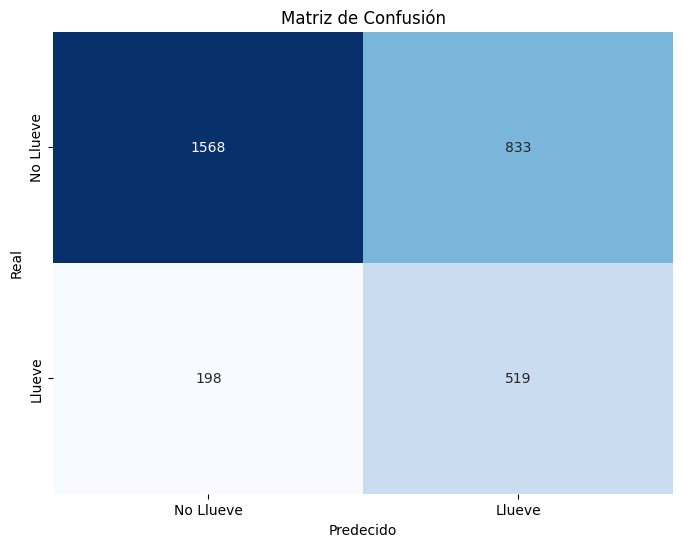

In [124]:
plot_matrix (y_test_cla, y_pred)

Hemos obtenido una matriz de confusión de 3118 datos del modelo elaborado a partir del conjunto de datos para clasificación.

Lo primero que observamos es que la matriz muestra: 1568 VN (0, no llueve), 519 VP(1, llueve), 525 FN (0, no llueve) y 858 FP(1, llueve).

Todas las métricas que analizamos varían entre 0 y 1 (proporción).

Comencemos por la accuracy (exactitud): El score que acuracy que obtuvimos es de 0.67, lo que significa que para la totalidad de las predicciones, el modelo tiene un probabilidad de 0.67 de arrojar una predicción correcta.

La precisión se puede medir según la clase. La clase 1 (llueve) es True para la lluvia del dia de mañana, y 0 (no llueve) False:

* Para la clase 1 la precisión es de 0.38, que indica la proporción de valores positivos entre aquellos que lo eran y los que el modelo tomó como verdaderos, pero no lo eran.

* Para la clase 0 la precisión es de 0.89, que indica la proporción de valores negativos entre aquellos que lo eran y los que el modelo tomó como negativos, pero no lo eran.

**En base a la precisión podemos decir que el modelo comete un error menor al estimar cuándo no lloverá (en relación a los FP) que cuando lloverá (en relación a los FN).**

El recall también se puede medir según la clase (0 - 1):

* Para la clase 1 tenemos un recall 0.72, que indica la proporción de valores positivos entre aquellos que lo eran y los que el modelo tomó negativos pero eran verdaderos.
* Para la clase 0 tenemos un recall 0.65. que indica que la proporción de valores negativos que los eran y los que el modelo tomó como positivos pero eran falsos.

**En base al recall podemos decir que el modelo comete un error menor al estimar cuándo lloverá (en relación a los FN) que cuando no lloverá (en relación a los FP).**


El f1-score relaciona precisión con el recall y es una métrica que explica la relación en el modelo para cada clase entre ambas. Como puede apreciarse la métrica es mejor para la clase 0 que la 1.

**En nuestro caso los datos están balanceados. Entonces es correcto utilizar accuracy(exactitud). Los FP son mayores a los FN, entonces es correcto utilizar precisión, no así recall, o, en todo caso, como tanto FP y FN son de proporción importante, sería correcto utilizar f1-score.**

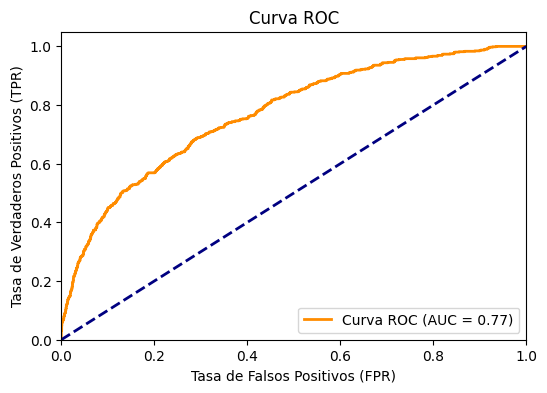

In [125]:
# Obtengo las probabilidades de predicción del modelo
y_probs = logistic_model.predict_proba(x_test_cla)[:, 1]

plot_ROC(y_test_cla, y_probs)

La curva ROC (Receiver Operating Characteristic) es representa cómo cambia la tasa de verdaderos positivos en función de la tasa de falsos positivos. El área bajo la curva AUC nos da un proporción de 0.77, lo cual indica que el modelo puede discriminar entre las clases mejor que el azar, pero no llega a un óptimo de 1, que sería no cometer errores en la clasificación.   

# 14) EXPLICABILIDAD PARA REGRESIÓN LOGÍSTICA (SHAP)

Al igual que para el modelo de regresión, ahora aplicamos SHAP para el de clasificación y así establecer cuáles de la características explican mejor la predicción del modelo generado.

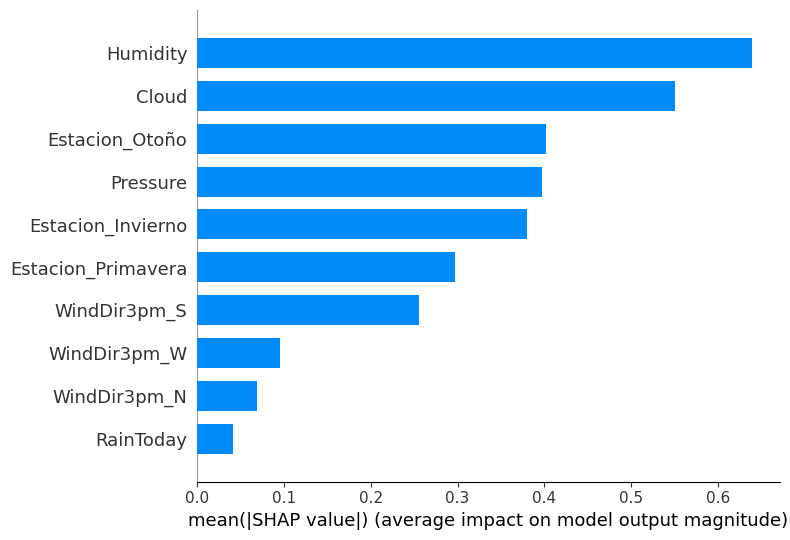

In [126]:
# Crear un explainer SHAP
explainer = shap.Explainer(logistic_model, x_train_cla)

# Obtener valores SHAP para las predicciones en el conjunto de prueba
shap_values = explainer.shap_values(x_test_cla)

# Mostrar el gráfico de barras horizontales
shap.summary_plot(shap_values, x_test_cla, feature_names=X_train_cla.columns, plot_type="bar")
plt.show()


Como puede apreciarse, la "Humidity" es la variable que más contribuye a la predicción del modelo de clasificación, que lo era también para el de regresión lineal. El gráfico de barras de SHAP es congruente con las elecciones de variables en números reales que hicimos mediante los boxplot, dado que aquellas por las que optamos son tres, y en el presente gráfico están entre las cuatro primeras.   

# 15) REGULARIZACIÓN PARA REGRESIÓN LOGÍSTICA

Aplicamos regularización para aproximar a un mejor modelo reduciendo el impactos de los coeficiente menos significativos en la regresión y hacemos una optimización de hiperparámetros del modelo al implementarlo.

In [127]:
# Definimos el espacio de búsqueda de hiperparámetros
parametros = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Valores para la inversa de la regularización (C)
    'penalty': ['l1', 'l2'],  # Tipo de regularización (L1 o L2)
}

# Creamos un modelo de regresión logística
logistic_model = LogisticRegression(random_state=10)

# Creamos un objeto GridSearchCV
grid_search = GridSearchCV(estimator=logistic_model, param_grid=parametros, cv=5, scoring='accuracy')

# Ajustamos el modelo a los datos de entrenamiento usando validación cruzada
grid_search.fit(X_train_cla, Y_train_cla)

# Obtenemos los mejores hiperparámetros
mejor_C = grid_search.best_params_['C']
mejor_penalty = grid_search.best_params_['penalty']

# Creamos un nuevo modelo de regresión logística con los mejores hiperparámetros
logistic_model_final = LogisticRegression(random_state=10, C=mejor_C, penalty=mejor_penalty)

# Ajustamos el modelo final a los datos de entrenamiento
logistic_model_final.fit(X_train_cla, Y_train_cla)

# Realizamos predicciones en los datos de prueba
y_pred_final = logistic_model_final.predict(x_test_cla)

# Evaluamos el rendimiento del modelo final
print("Resultados con regresión logística y mejores hiperparámetros\n")
print(classification_report(y_test_cla, y_pred_final))
print(confusion_matrix(y_test_cla, y_pred_final))

# Imprimimos los mejores hiperparámetros
print("Mejor valor para C:", mejor_C)
print("Mejor tipo de regularización:", mejor_penalty)

Resultados con regresión logística y mejores hiperparámetros

              precision    recall  f1-score   support

           0       0.89      0.65      0.75      2401
           1       0.38      0.72      0.50       717

    accuracy                           0.67      3118
   macro avg       0.64      0.69      0.63      3118
weighted avg       0.77      0.67      0.69      3118

[[1568  833]
 [ 198  519]]
Mejor valor para C: 1
Mejor tipo de regularización: l2


Con la optimización de hiperparámetro la métricas son iguales a la que arrojó el modeo sin hacer optimización.  

# 16) RED NEURONAL PARA CLASIFICACIÓN

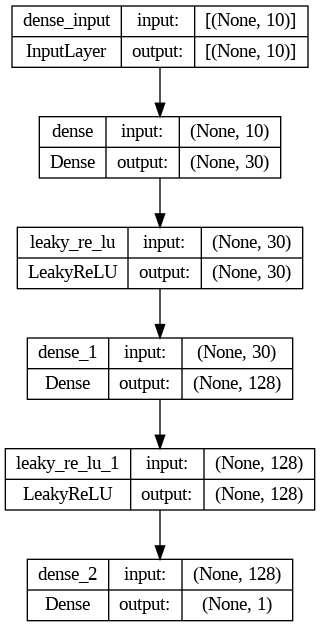

In [128]:
# Modelo de red neuronal
model = Sequential()

# Capa de entrada
model.add(Dense(30, input_shape=(10,)))
model.add(LeakyReLU(alpha=0.01))  # Puedes ajustar el valor de alpha según tus preferencias

# Capa oculta
model.add(Dense(128))
model.add(LeakyReLU(alpha=0.01))

# Capa de salida para regresión con activación sigmoide
model.add(Dense(1, activation='sigmoid'))

# Guardar el modelo como imagen
plot_model(model, to_file='modelo.png', show_shapes=True)

In [129]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [130]:
model.fit(X_train_cla, Y_train_cla, epochs=3, batch_size=3, validation_data=(x_test_cla, y_test_cla))

Epoch 1/3
6464/6464 [==============================] - 21s 3ms/step - loss: 0.4973 - accuracy: 0.7519 - val_loss: 0.5648 - val_accuracy: 0.7158
Epoch 2/3
6464/6464 [==============================] - 18s 3ms/step - loss: 0.4804 - accuracy: 0.7631 - val_loss: 0.5707 - val_accuracy: 0.6998
Epoch 3/3
6464/6464 [==============================] - 19s 3ms/step - loss: 0.4767 - accuracy: 0.7669 - val_loss: 0.5732 - val_accuracy: 0.7091


In [131]:
loss, accuracy = model.evaluate(x_test_cla, y_test_cla)
print(f'Pérdida test: {loss}')
print(f'Exactitud test: {accuracy}')

98/98 [==============================] - 0s 2ms/step - loss: 0.5732 - accuracy: 0.7091
Pérdida test: 0.5731605291366577
Exactitud test: 0.7091084122657776


In [132]:
model.save('llueve_si_no_modelo.h5')

In [133]:
modelo_red_llueve_si_no = load_model('llueve_si_no_modelo.h5')

In [134]:
# Obtener las predicciones del modelo en los datos de prueba
y_pred = modelo_red_llueve_si_no.predict(x_test_cla)
y_pred_clases = (y_pred > 0.5).astype(int)  # Convertir las probabilidades a clases binarias (0 o 1)

98/98 [==============================] - 0s 2ms/step


In [135]:
print("Resultados\n")
print(classification_report(y_test_cla, y_pred_clases))


Resultados

              precision    recall  f1-score   support

           0       0.89      0.71      0.79      2401
           1       0.42      0.69      0.52       717

    accuracy                           0.71      3118
   macro avg       0.65      0.70      0.66      3118
weighted avg       0.78      0.71      0.73      3118



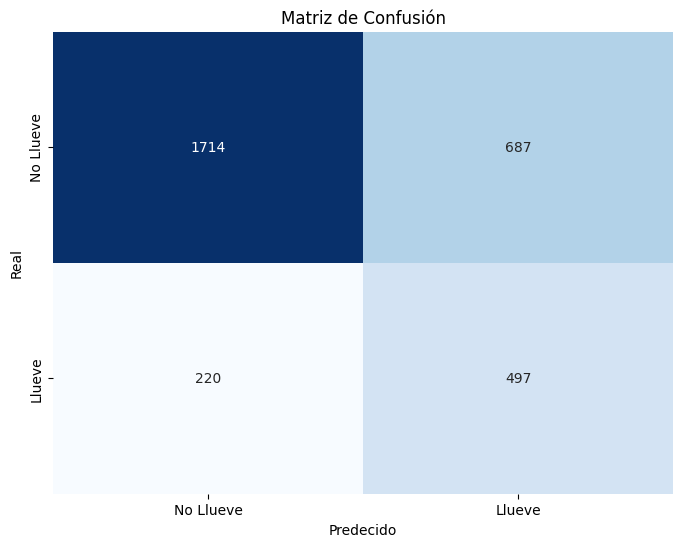

In [136]:
plot_matrix(y_test_cla, y_pred_clases)

Como puede apreciarse, tras aplicar un modelo de red neuronal, las métricas han mejorado sin siquiera optimizar hiperparámetros, lo cual se denota también en la matriz de confusión.  

# 17) RED NEURONAL PARA REGRESIÓN

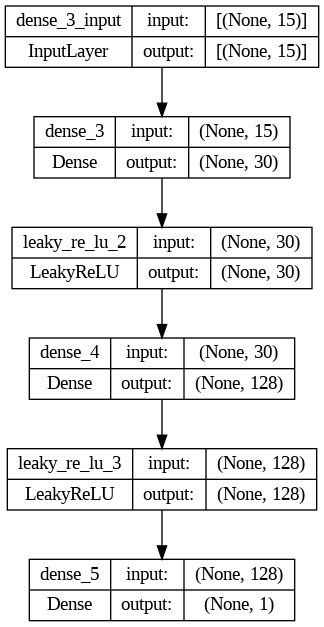

In [137]:
# Modelo de red neuronal
model = Sequential()

# Capa de entrada
model.add(Dense(30, input_shape=(15,)))
model.add(LeakyReLU(alpha=0.01))  # Puedes ajustar el valor de alpha según tus preferencias

# Capa oculta
model.add(Dense(128))
model.add(LeakyReLU(alpha=0.01))

# Capa de salida para regresión con activación sigmoide
model.add(Dense(1, activation='linear'))

# Guardar el modelo como imagen
plot_model(model, to_file='modelo.png', show_shapes=True)

In [138]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [139]:
model.fit(X_train_reg, Y_train_reg, epochs=3, batch_size=3, validation_data=(x_test_reg, y_test_reg))

Epoch 1/3
4157/4157 [==============================] - 14s 3ms/step - loss: 35.1871 - mae: 2.4434 - val_loss: 31.5470 - val_mae: 2.3384
Epoch 2/3
4157/4157 [==============================] - 12s 3ms/step - loss: 34.1574 - mae: 2.3844 - val_loss: 31.4731 - val_mae: 2.7942
Epoch 3/3
4157/4157 [==============================] - 11s 3ms/step - loss: 33.8203 - mae: 2.3839 - val_loss: 31.0042 - val_mae: 2.6150


In [140]:
model.save('llueve_milimetros_modelo.h5')

In [141]:
modelo_red_llueve_milimetros = load_model('llueve_milimetros_modelo.h5')

In [142]:
# Obtener predicciones en los datos de prueba
y_pred = model.predict(x_test_reg)

# Calcular métricas de regresión
mae = mean_absolute_error(y_test_reg, y_pred)
mse = mean_squared_error(y_test_reg, y_pred)
rmse = mean_squared_error(y_test_reg, y_pred, squared=False)  # Calcular RMSE a partir de MSE
r2 = r2_score(y_test_reg, y_pred)

print("#### LAS MÉTRICAS SEGÚN EL LA RED NEURONAL SON:")
print('')
print(f"Mean Squared Error (MSE): {round(mse, 4)}")
print('')
print(f"Root Mean Squared Error (RMSE): {round(rmse, 4)}")
print("")
print(f"Mean Absolute Error (MAE): {round(mae, 4)}")
print("")
print('R²:', round(r2, 4))
print("")

98/98 [==============================] - 0s 2ms/step
#### LAS MÉTRICAS SEGÚN EL LA RED NEURONAL SON:

Mean Squared Error (MSE): 31.0042

Root Mean Squared Error (RMSE): 5.5681

Mean Absolute Error (MAE): 2.615

R²: 0.2204



Como puede apreciarse, las métricas han mejorado al aplicar el modelo de red neuronal, los mismo que en caso anterior (para clasificación) sin siquiera optimizar hiperparámetros.

# 18) PIPELINE DE MODELOS DE REDES NEURONALES

In [143]:
class NeuralNetworkRegressor(BaseEstimator, TransformerMixin):
    def __init__(self, input_dim):
        self.input_dim = input_dim
        self.model = self._build_model()

    def _build_model(self):
        model = Sequential()
        model.add(Dense(30, input_shape=(self.input_dim,)))
        model.add(LeakyReLU(alpha=0.01))
        model.add(Dense(128))
        model.add(LeakyReLU(alpha=0.01))
        model.add(Dense(1, activation='linear'))
        model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])
        return model

    def fit(self, X, y):
        self.model.fit(X, y, epochs=3, batch_size=3, verbose=0)
        return self

    def predict(self, X):
        y_pred = self.model.predict(X)
        return np.squeeze(y_pred)

    def evaluate(self, X, y):
        y_pred = self.predict(X)
        mae = mean_absolute_error(y, y_pred)
        mse = mean_squared_error(y, y_pred)
        rmse = mean_squared_error(y, y_pred, squared=False)
        r2 = r2_score(y, y_pred)

        print(f'Mean Absolute Error (MAE): {mae}')
        print(f'Mean Squared Error (MSE): {mse}')
        print(f'Root Mean Squared Error (RMSE): {rmse}')
        print(f'R2 Score: {r2}')

    def save_model(self, filename):
        self.model.save(filename)

    def load_model(self, filename):
        self.model = load_model(filename)

In [144]:
class NeuralNetworkClassifier(BaseEstimator, TransformerMixin):
    def __init__(self, input_dim):
        self.input_dim = input_dim
        self.model = self._build_model()

    def _build_model(self):
        model = Sequential()
        model.add(Dense(30, input_shape=(self.input_dim,)))
        model.add(LeakyReLU(alpha=0.01))
        model.add(Dense(128))
        model.add(LeakyReLU(alpha=0.01))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
        return model

    def fit(self, X, y):
        self.model.fit(X, y, epochs=3, batch_size=3, verbose=0)
        return self


    def predict(self, X):
        y_pred = self.model.predict(X)
        return (y_pred > 0.5).astype(int)

    def evaluate(self, X, y):
        loss, accuracy = self.model.evaluate(X, y, verbose=0)
        print(f'Pérdida test: {loss}')
        print(f'Exactitud test: {accuracy}')

    def save_model(self, filename):
        self.model.save(filename)

    def load_model(self, filename):
        self.model = load_model(filename)

In [145]:
pipeline_clas = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
   ( 'scaler', StandardScaler()),
    ('Red_Neuronal_clas', NeuralNetworkClassifier(input_dim=X_train_cla.shape[1]))
    ])

In [146]:
pipeline_reg = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
   ( 'scaler', StandardScaler()),
    ('Red_Neuronal_reg', NeuralNetworkRegressor(input_dim=X_train_reg.shape[1]))
    ])

In [147]:
pipeline_reg.fit(X_train_reg, Y_train_reg)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('Red_Neuronal_reg', NeuralNetworkRegressor(input_dim=15))])

In [148]:
pipeline_clas.fit(X_train_cla, Y_train_cla)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('Red_Neuronal_clas', NeuralNetworkClassifier(input_dim=10))])

In [149]:
joblib.dump(pipeline_clas, 'lluvia_australia_clas_prediction.pkl')
joblib.dump(pipeline_reg, 'lluvia_australia_reg_prediction.pkl')

['lluvia_australia_reg_prediction.pkl']

# 19) PIPELINE DE MODELOS LINEALES

In [150]:
class ModelClassifier(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.logistic_model = self._build_model()

    def _build_model(self):
        logistic_model = LogisticRegression(random_state=10)
        return logistic_model

    def fit(self, X, y):
        self.logistic_model.fit(X, y)
        return self

    def predict(self, X):
        y_pred = self.logistic_model.predict(X)
        return y_pred


In [151]:
class ModelRegressor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.logistic_model = self._build_model()

    def _build_model(self):
        logistic_model = LinearRegression()
        return logistic_model

    def fit(self, X, y):
        self.logistic_model.fit(X, y)
        return self

    def predict(self, X):
        y_pred = self.logistic_model.predict(X)
        return y_pred

In [152]:
pipeline_reg_lin = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
   ( 'scaler', StandardScaler()),
    ('Red_Neuronal_reg', ModelRegressor())
    ])

In [153]:
pipeline_clas_lin = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
   ( 'scaler', StandardScaler()),
    ('Red_Neuronal_clas', ModelClassifier())
    ])

In [154]:
pipeline_reg_lin.fit(X_train_reg, Y_train_reg)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('Red_Neuronal_reg', ModelRegressor())])

In [155]:
pipeline_clas_lin.fit(X_train_cla, Y_train_cla)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('Red_Neuronal_clas', ModelClassifier())])

In [156]:
joblib.dump(pipeline_clas_lin, 'lluvia_australia_clas_lin_prediction.pkl')
joblib.dump(pipeline_reg_lin, 'lluvia_australia_reg_lin_prediction.pkl')

['lluvia_australia_reg_lin_prediction.pkl']

# CONCLUSIÓN

Durante el desarrollo obtuvimos resultados que fuimos interpretando, y no los repetiremos a modo de resumen. Nos inclinaremos más, justamente, a deducir conclusiones sobre el proceso de trabajo que nos sirvan como proyección hacia futuras problemáticas en el desarrollo de modelos de aprendizaje automático.

Lo primero que podemos decir es que corroboramos en la experiencia lo que tantas veces se nos ha repetido en los diferentes cursos de la Tecnicatura: en el mundo de la ciencia de datos y aprendizaje automático, la mayor parte del tiempo se ocupa en conocer los datos, procesarlos, diseñar un enfoque adecuado, es decir, en el tratamiento de ellos antes de la construcción de los modelos.
Esto no sólo podemos afirmarlo desde la experiencia, sino que además queda denotado en la extensión de código dedicado a este fin.

Por otra parte y de modo general, la performance de los modelos en la predicción de la lluvia es deficiente, cuestión que confirmamos cada vez que interpretamos las métricas y gráficos obtenidos. Además, este problema no pudo ser zanjado haciendo la optimización de hiperparámetros, sólo conseguimos en algunos casos, leves mejorías. Sí nos sorprendió que al aplicar redes neuronales, sin llegar a optimizar sus hiperparámetros, es decir,
(y prácticamente), optando por una arquitectura azarosa, las métricas demostraron un mejor desempeño; aunque, no fueron suficientes como para siquiera afirmar que los modelos tienen una predicción regular. Igualmente, esta diferencia demuestra un mejor rendimiento de las redes por sobre la otras técnicas de aprendizaje automático que aprendimos en el curso.

En base a lo anterior concluimos que dados los resultados obtenidos, no hubiéramos puesto en producción el modelo. Sólo lo hicimos porque era una consigna del trabajo práctico. De habernos encontrado en una situación real de puesta en práctica de un problema de predicción como el que nos fue planteado, antes deberíamos mejorar las métricas. Ahora bien, ¿de qué modo hacerlo? Esta es una pregunta que se responde en parte con lo ya dicho: volver al principio, al tratamiento de los datos, evaluar la calidad y cantidad, el modo en que los imputamos, la elección de variables, etc. No olvidemos que obtuvimos un ranking de explicabilidad para algunos de los modelos que mostraban la importancia de ciertas variables en las predicciones, y, dado que son deficientes, podríamos prestar particular atención a ellas, porque así como aportan explicabilidad al modelo, bien podría tras ellas y su tratamiento alojarse la razón de la mala performance de los modelos.

A modo de cierre, afirmamos que en el mundo de la ciencia de datos y el aprendizaje automático, el mayor tiempo lo consumimos en el tratamiento de los datos, no solamente porque dedicamos tiempo a su procesamiento, sino además porque, insoslayablemente, más de las veces, deberemos volver a ellos.
